In [270]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns, numpy as np

In [77]:
# Load data
London_data = pd.read_csv('london_flows.csv')
london_network = nx.read_graphml('london.graph.xml')

In [78]:
#check data
print(nx.info(london_network))
#check nodes
list(london_network.nodes(data = True))[0]

Graph with 401 nodes and 467 edges


('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [79]:
list(london_network.edges(data = True))[2]

('Wembley Park',
 'Preston Road',
 {'length': 1419.7351657633037, 'line_name': 'Metropolitan', 'flows': 36601})

In [80]:
#coords is string, conver it using eval
for node in london_network.nodes():
    london_network.nodes[node]['coords'] = eval(london_network.nodes[node]['coords']) 

In [81]:
#check node again
list(london_network.nodes(data = True))[2]
#check edge data
list(london_network.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

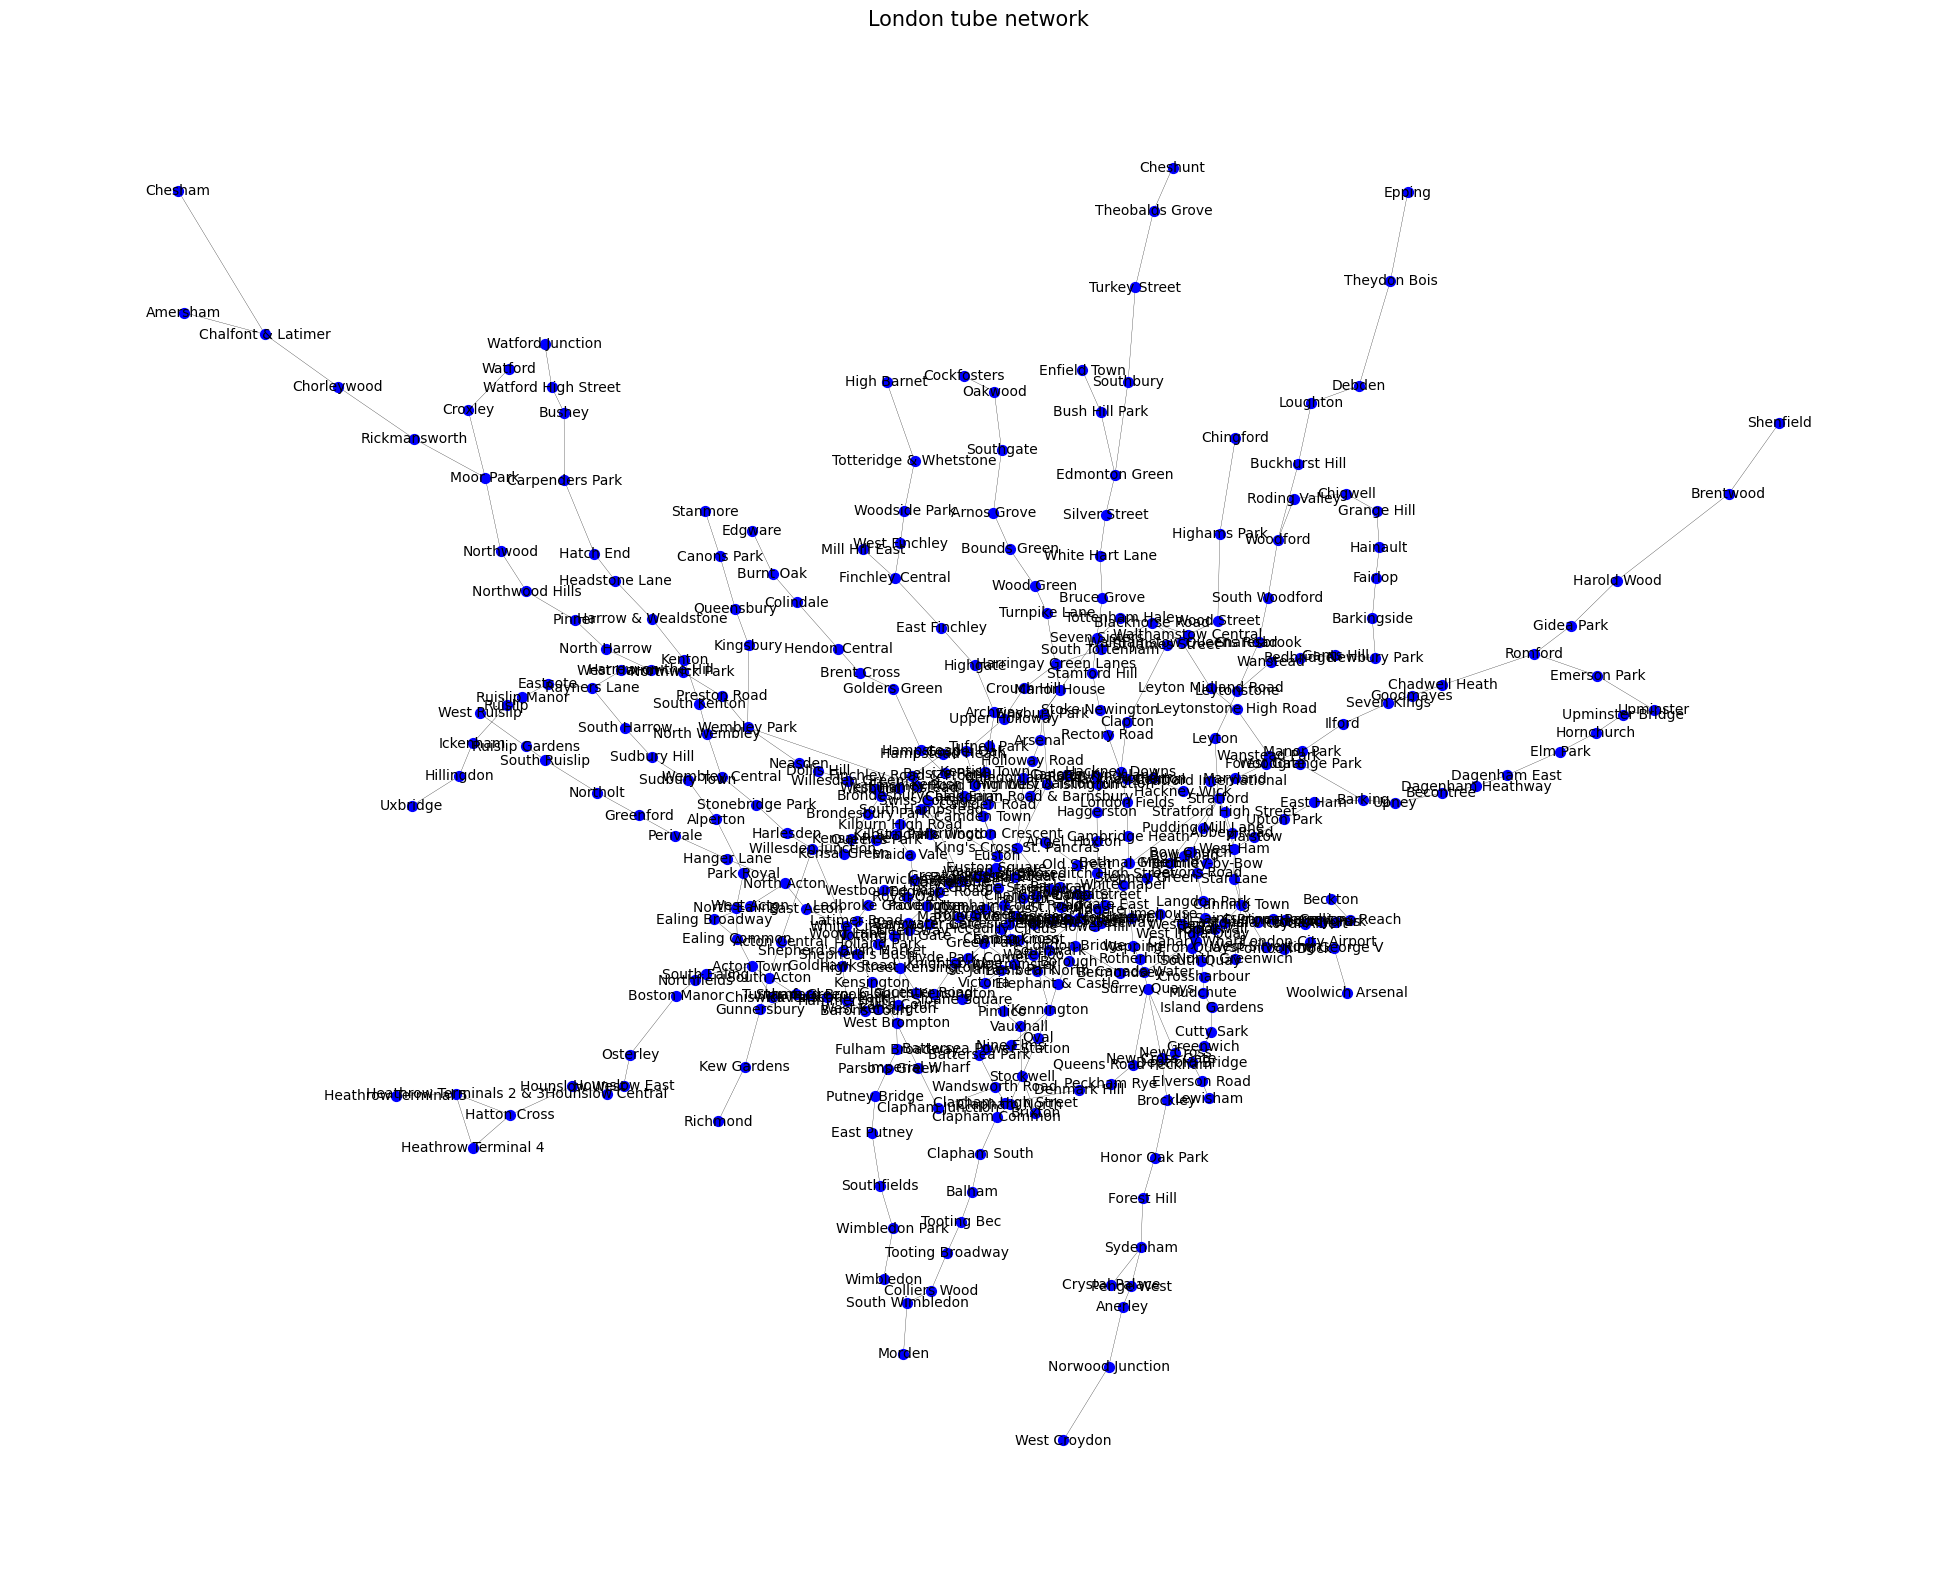

In [82]:
#draw it to check the general spatial pattern
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(london_network, 'coords')

nx.draw_networkx_nodes(london_network,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(london_network,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(london_network,pos, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [83]:
df = nx.to_pandas_edgelist(london_network)
df[0:10]

,source,target,flows,length,line_name
0,Wembley Park,Kingsbury,12356,2916.771558,Jubilee
1,Wembley Park,Neasden,6744,2353.165938,Jubilee
2,Wembley Park,Preston Road,36601,1419.735166,Metropolitan
3,Wembley Park,Finchley Road,55216,7266.373927,Metropolitan
4,Kingsbury,Queensbury,9419,1245.995234,Jubilee
5,Queensbury,Canons Park,6385,1693.307343,Jubilee
6,Canons Park,Stanmore,3624,1419.669476,Jubilee
7,Stratford,West Ham,91801,1673.509515,Jubilee
8,Stratford,Mile End,12010,2805.001392,Central
9,Stratford,Leyton,56082,2131.342926,Central


# 1. Centrality Measures

# 1.1.Degree centrality


In [84]:
#calculate degree centrality
deg_london =nx.degree_centrality(london_network)
nx.set_node_attributes(london_network,dict(deg_london),'degree')

In [85]:
london_network

In [86]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=london_network.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(london_network, 'degree'))
df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


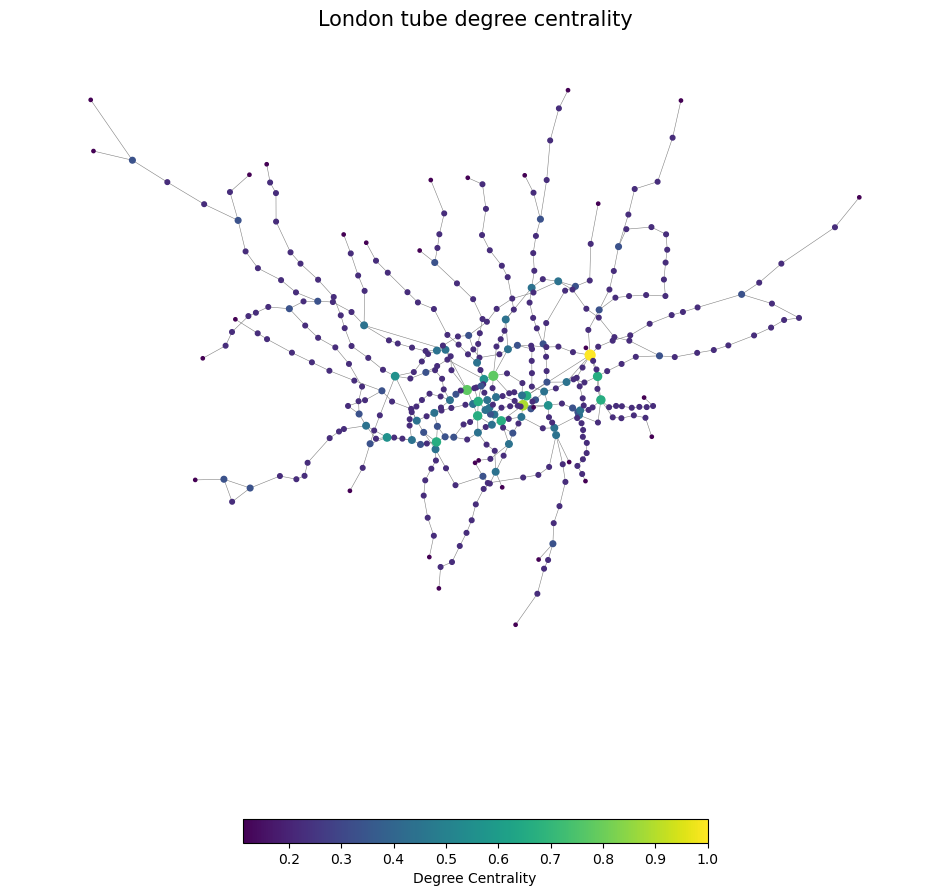

In [87]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in london_network.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in london_network.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in london_network.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(london_network, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(london_network,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

# 1.2.Betweenness Centrality

In [88]:

bet_london =nx.betweenness_centrality(london_network,normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(london_network,bet_london,'betweenness')


In [89]:
# To dataframe using the nodes as the index
df1 = pd.DataFrame(index=london_network.nodes())
df1['betweenness'] = pd.Series(nx.get_node_attributes(london_network, 'betweenness'))

df_sorted1 = df1.sort_values(["betweenness"], ascending=False)
df_sorted1[0:10]

,betweenness
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


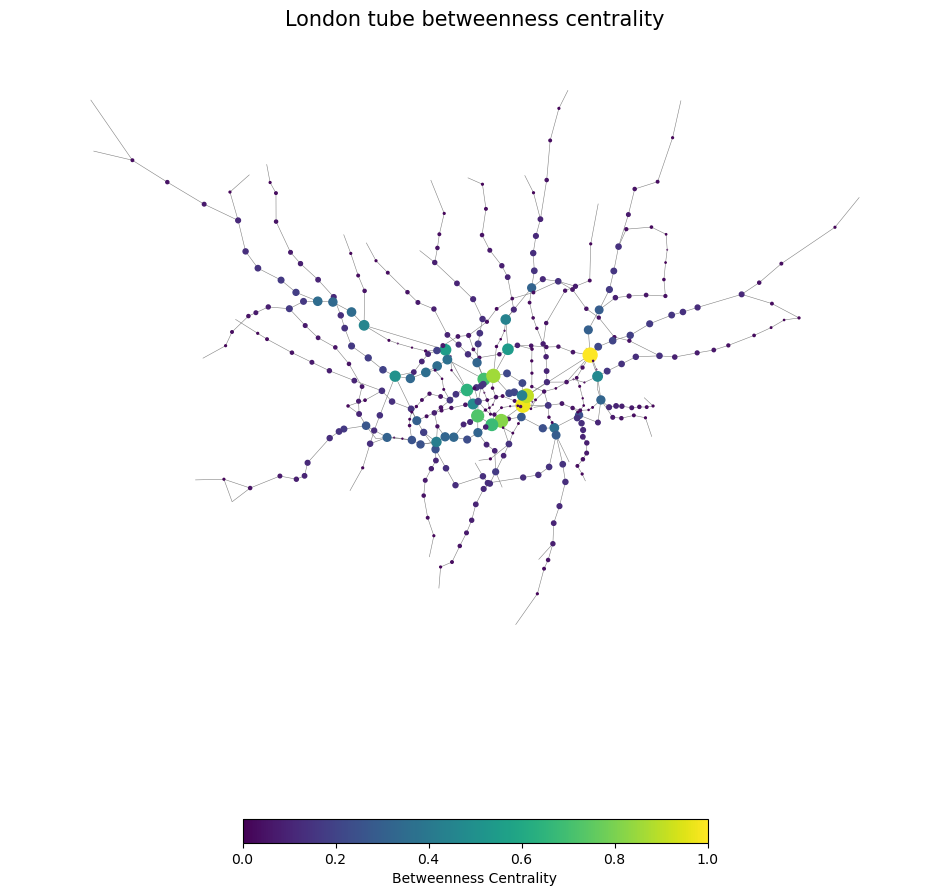

In [90]:
# Lets set colour and size of nodes according to betweenness values
betweenness_values=[(i[1]['betweenness']) for i in london_network.nodes(data=True)]

bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in london_network.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values))*100 for i in london_network.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(london_network, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(london_network,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

# 1.3.Closeness Centrality 

In [91]:
close=nx.closeness_centrality(london_network)
# We can add these values to the nodes attributes:
nx.set_node_attributes(london_network,close,'closeness')

# To ataframe using the nodes as the index
df2 = pd.DataFrame(index=london_network.nodes())
df2['closeness'] = pd.Series(nx.get_node_attributes(london_network, 'closeness'))

df_sorted2 = df2.sort_values(["closeness"], ascending=False)
df_sorted2[0:10]

,closeness
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


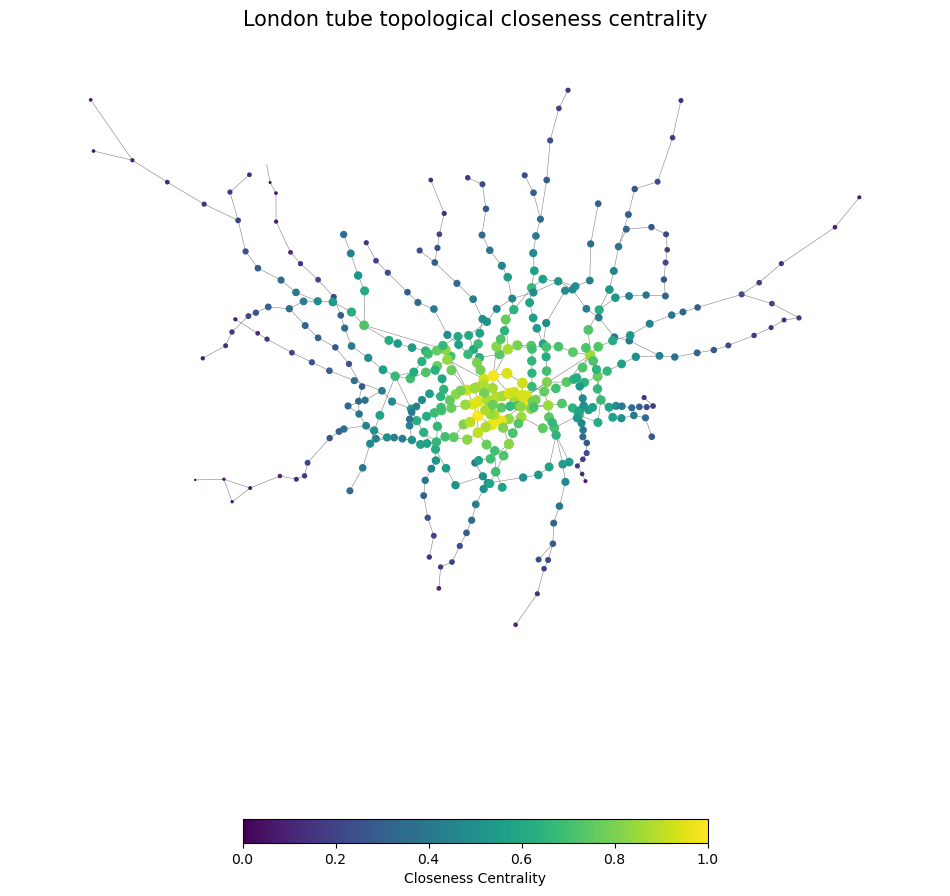

In [92]:
clos_val=[(i[1]['closeness']) for i in london_network.nodes(data=True)]

closs_color=[(i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val)) for i in london_network.nodes(data=True)]
closs_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in london_network.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(london_network, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(london_network,
        pos = pos,
        node_color= closs_color,
        node_size= closs_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [93]:
test=london_network.copy()

In [94]:
# Degree of any node at the Erdős-Rényi graph:
degree_test=nx.degree(test)

nx.set_node_attributes(test,dict(degree_test),'deg')
test_deg=[(i[1]['deg']) for i in test.nodes(data=True)] 

In [95]:
degree_valuestest = sorted(set(test_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilitytest = [round(list(test_deg).count(i)/float(nx.number_of_nodes(test)),4) for i in degree_valuestest]  # this give us the p(k) values

In [96]:
df_test = pd.DataFrame({'k':degree_valuestest,'p(k)':probabilitytest})
df_test 

,k,p(k)
0,1,0.0773
1,2,0.7157
2,3,0.0898
3,4,0.0798
4,5,0.0100
5,6,0.0175
6,7,0.0050
7,8,0.0025
8,9,0.0025


# 1.3A: 
## 1.3A.1.Impact measure(1): Largest connected component (LCC) 
## 1.3A.1.1.Degree centrality

In [97]:
# Copy the dataset to infringe influence to the original dataset
LCC=london_network.copy()
print(nx.info(LCC))

Graph with 401 nodes and 467 edges


In [98]:
Dvalues_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
Dsorted_ten=[e for e,v in Dvalues_sorted[:10]]
Dsorted_ten

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [99]:
# Top10 list
D_LCC=[]
components = nx.connected_components(LCC)
largest_component = max(components, key=len)
Largest_subgraph = LCC.subgraph(largest_component)   
diameter = nx.diameter(Largest_subgraph)
D_LCC.append(Largest_subgraph.number_of_nodes())
for i in Dsorted_ten:
    LCC.remove_node(i)
    components = nx.connected_components(LCC)
    largest_component = max(components, key=len)
    Largest_subgraph = LCC.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    D_LCC.append(Largest_subgraph.number_of_nodes())
    print("removed node is", i)
    print("Components", nx.number_connected_components(LCC), ",", "LCC nodes is", Largest_subgraph.number_of_nodes(),",", "and", "LCC edge is", diameter)
    

removed node is Stratford
Components 3 , LCC nodes is 379 , and LCC edge is 49
removed node is Bank and Monument
Components 3 , LCC nodes is 378 , and LCC edge is 49
removed node is Baker Street
Components 3 , LCC nodes is 377 , and LCC edge is 49
removed node is King's Cross St. Pancras
Components 4 , LCC nodes is 374 , and LCC edge is 49
removed node is West Ham
Components 5 , LCC nodes is 371 , and LCC edge is 53
removed node is Canning Town
Components 8 , LCC nodes is 356 , and LCC edge is 53
removed node is Waterloo
Components 8 , LCC nodes is 355 , and LCC edge is 53
removed node is Green Park
Components 8 , LCC nodes is 354 , and LCC edge is 53
removed node is Oxford Circus
Components 9 , LCC nodes is 352 , and LCC edge is 53
removed node is Liverpool Street
Components 10 , LCC nodes is 346 , and LCC edge is 53


In [100]:
D_LCC

[401, 379, 378, 377, 374, 371, 356, 355, 354, 352, 346]

In [101]:
#Get size
for v in range(len(D_LCC)):
    D_LCC[v]=D_LCC[v]/401

In [102]:
#Final result
D_LCC

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9326683291770573,
 0.9251870324189526,
 0.8877805486284289,
 0.885286783042394,
 0.8827930174563591,
 0.8778054862842892,
 0.8628428927680798]

## 1.3A.1.2.Betweeness Centrality

In [103]:
# Copy the dataset to infringe influence to the original dataset
LCC_B=london_network.copy()
print(nx.info(LCC_B))

Graph with 401 nodes and 467 edges


In [104]:
Bvalues_sorted = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
Bsorted_ten=[e for e,v in Bvalues_sorted[:10]]
Bsorted_ten

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [105]:
# Top10 list
B_LCC=[]
components = nx.connected_components(LCC_B)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = LCC_B.subgraph(largest_component)   
diameter = nx.diameter(Largest_subgraph)
B_LCC.append(Largest_subgraph.number_of_nodes())
for i in Bsorted_ten:
    # Get the list of components:
    LCC_B.remove_node(i)
    components = nx.connected_components(LCC_B)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = LCC_B.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    B_LCC.append(Largest_subgraph.number_of_nodes())
    #print("Components", nx.number_connected_components(LCC_B), ",", "LCC nodes is", Largest_subgraph.number_of_nodes(),",", "and", "LCC edge is", diameter)

In [106]:
B_LCC

[401, 379, 378, 377, 371, 370, 369, 346, 345, 342, 339]

In [107]:
for v in range(len(B_LCC)):
    B_LCC[v]=B_LCC[v]/401
B_LCC

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9251870324189526,
 0.9226932668329177,
 0.9201995012468828,
 0.8628428927680798,
 0.8603491271820449,
 0.8528678304239401,
 0.8453865336658354]

## 1.3A.1.3.Closeness Centrality

In [108]:
# Copy the dataset to infringe influence to the original dataset
LCC_C=london_network.copy()
print(nx.info(LCC_C))

Graph with 401 nodes and 467 edges


In [109]:
# Top10 list
Cvalues_sorted = sorted(close.items(), key=itemgetter(1), reverse=True)
Csorted_ten=[e for e,v in Cvalues_sorted[:10]]
Csorted_ten

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [110]:
C_LCC=[]
components = nx.connected_components(LCC_C)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
 # Create a "subgraph" of the largest component
Largest_subgraph = LCC_C.subgraph(largest_component)   
diameter = nx.diameter(Largest_subgraph)
C_LCC.append(Largest_subgraph.number_of_nodes())

for i in Csorted_ten:
    LCC_C.remove_node(i)
    # Get the list of components:
    components = nx.connected_components(LCC_C)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = LCC_C.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    C_LCC.append(Largest_subgraph.number_of_nodes())
    print("Components", nx.number_connected_components(LCC_C), ",", "LCC nodes is", Largest_subgraph.number_of_nodes(),",", "and", "LCC edge is", diameter)

Components 1 , LCC nodes is 400 , and LCC edge is 36
Components 1 , LCC nodes is 399 , and LCC edge is 38
Components 1 , LCC nodes is 398 , and LCC edge is 42
Components 1 , LCC nodes is 397 , and LCC edge is 42
Components 1 , LCC nodes is 396 , and LCC edge is 42
Components 1 , LCC nodes is 395 , and LCC edge is 45
Components 1 , LCC nodes is 394 , and LCC edge is 45
Components 1 , LCC nodes is 393 , and LCC edge is 45
Components 1 , LCC nodes is 392 , and LCC edge is 45
Components 3 , LCC nodes is 389 , and LCC edge is 45


In [111]:
C_LCC

[401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 389]

In [112]:
for v in range(len(C_LCC)):
    C_LCC[v]=C_LCC[v]/401
C_LCC

[1.0,
 0.9975062344139651,
 0.9950124688279302,
 0.9925187032418953,
 0.9900249376558603,
 0.9875311720698254,
 0.9850374064837906,
 0.9825436408977556,
 0.9800498753117207,
 0.9775561097256857,
 0.970074812967581]

## 1.3A.2.Impact measure(2): Efficiency(EFF)

## 1.3A.2.1.Degree Centrality

In [113]:
from networkx import algorithms 
from networkx.algorithms import efficiency 
from networkx.algorithms import global_efficiency

In [114]:
# Copy the dataset to infringe influence to the original dataset
D_EFF=london_network.copy()
print(nx.info(D_EFF))

Graph with 401 nodes and 467 edges


In [115]:
print("The original efficiency is", global_efficiency(D_EFF))
EFF_D=[]
EFF_D.append(global_efficiency(D_EFF))
for i in Dsorted_ten:
    D_EFF.remove_node(i)
    EFF_D.append( global_efficiency(D_EFF))
EFF_D

The original efficiency is 0.1012561935972123


[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08203328759057034,
 0.07570039409751211,
 0.07302243396164704,
 0.06893502024058405,
 0.06721932836875794,
 0.06622091057392582,
 0.06536196059296152,
 0.06373592086177943]

## 1.3A.2.2.Betweeness Centrality

In [116]:
B_EFF=london_network.copy()
print(nx.info(B_EFF))

Graph with 401 nodes and 467 edges


In [117]:
print("The original efficiency is", global_efficiency(B_EFF))
EFF_B=[]
EFF_B.append(global_efficiency(B_EFF))
for i in Bsorted_ten:
    B_EFF.remove_node(i)
    EFF_B.append(global_efficiency(B_EFF))

The original efficiency is 0.1012561935972123


In [118]:
EFF_B

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08496349266423939,
 0.07849775440713821,
 0.07594226578366223,
 0.07415154167648695,
 0.06820564659789057,
 0.06765950327361094,
 0.064700058053009,
 0.06313903700825897]

## 1.3A.2.3.closeness centrality

In [119]:
C_EFF=london_network.copy()
print(nx.info(C_EFF))

Graph with 401 nodes and 467 edges


In [120]:
print("The original efficiency is", global_efficiency(C_EFF))
EFF_C=[]
EFF_C.append(global_efficiency(C_EFF))
for i in Csorted_ten:
    C_EFF.remove_node(i)
    EFF_C.append(global_efficiency(C_EFF))
EFF_C

The original efficiency is 0.1012561935972123


[0.1012561935972123,
 0.09918991960788402,
 0.09487232544791133,
 0.08793385149140875,
 0.08737164566976727,
 0.08485943799789313,
 0.08278135073141742,
 0.08258086417012774,
 0.08260040537396239,
 0.08262233108950982,
 0.08166991436767818]

## 1.3A.3.Impact measure(3): cluster efficient

In [121]:
Cluster1=london_network.copy()

In [122]:
# let's measure the clustering coefficient
c = nx.clustering(Cluster1)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


## 1.3A.3.1 Degree Centrality

In [123]:
D_coeff=[]
D_coeff.append(c_avg)
for i in Dsorted_ten:
    Cluster1.remove_node(i)
    C=nx.clustering(Cluster1)
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    D_coeff.append(C_avg)

In [124]:
D_coeff

[0.030382377389858668,
 0.030624999999999982,
 0.030027449576321738,
 0.02705192629815743,
 0.027287993282955475,
 0.024410774410774386,
 0.024472573839662424,
 0.023434856175972907,
 0.02196776929601356,
 0.02372448979591835,
 0.023785166240409193]

## 1.3A.3.2.Closeness Centrality

In [125]:
##Closeness
Cluster1_C=london_network.copy()

In [126]:
# let's measure the clustering coefficient
c = nx.clustering(Cluster1_C)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


In [127]:
C_coeff=[]
C_coeff.append(c_avg)
for i in Csorted_ten:
    Cluster1_C.remove_node(i)
    C=nx.clustering(Cluster1_C)
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    C_coeff.append(C_avg)

In [128]:
C_coeff

[0.030382377389858668,
 0.029791666666666657,
 0.029275569877073627,
 0.02951663077291217,
 0.028079644956219254,
 0.02815055315055314,
 0.02990958408679927,
 0.030033840947546523,
 0.030110262934690407,
 0.030187074829931965,
 0.030264279624893427]

## 1.3A.3.3. Betweenness Centrality

In [129]:
#Betweeenness Centrality
Cluster1_B=london_network.copy()

In [130]:
B_coeff=[]
C=nx.clustering(Cluster1_B)
C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
C_avg = sum([a[1] for a in C]) / len(C)
B_coeff.append(C_avg)
for i in Bsorted_ten:
    Cluster1_B.remove_node(i)
    C=nx.clustering(Cluster1_B)
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    B_coeff.append(C_avg)

In [131]:
B_coeff

[0.030382377389858668,
 0.030624999999999982,
 0.030027449576321738,
 0.030102895429528577,
 0.030346647475110934,
 0.029329004329004316,
 0.028306208559373106,
 0.02499395697365239,
 0.025057554828547178,
 0.021598639455782304,
 0.021653878942881493]

# 1.3 B:

## 1.3B.1.Impact measure(1): Largest connected component (LCC)


## 1.3B.1.1 Degree Centrality

In [132]:
#Degree Centrality
# Copy the dataset to infringe influence to the original dataset
LCC1=london_network.copy()
print(nx.info(LCC1))

Graph with 401 nodes and 467 edges


In [133]:
deg_london2 =nx.degree_centrality(LCC1)
Dvalues_sorted1 = sorted(deg_london2.items(), key=itemgetter(1), reverse=True)
Dsorted_ten1=[e for e, v in Dvalues_sorted1[:10]]
components = nx.connected_components(LCC1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = LCC1.subgraph(largest_component)
LCC_D1=[]
LCC_D1.append(Largest_subgraph.number_of_nodes())

for i in Dsorted_ten1:
    i=Dsorted_ten1[0]
    LCC1.remove_node(i)
    #print("removed node is",  i)
    # Get the list of components:
    components = nx.connected_components(LCC1)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = LCC1.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    LCC_D1.append(Largest_subgraph.number_of_nodes())
    #realculate degree centrality
    deg_london2 =nx.degree_centrality(LCC1)
    Dvalues_sorted1 = sorted(deg_london2.items(), key=itemgetter(1), reverse=True)
    Dsorted_ten1=[e for e,v in Dvalues_sorted1[:10]]

In [134]:
LCC_D1

[401, 379, 378, 377, 374, 360, 359, 358, 357, 355, 341]

In [135]:
for v in range(len(LCC_D1)):
    LCC_D1[v]=LCC_D1[v]/401
LCC_D1

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9326683291770573,
 0.8977556109725686,
 0.8952618453865336,
 0.8927680798004988,
 0.8902743142144638,
 0.885286783042394,
 0.8503740648379052]

## 1.3B.1.2.Betweeness Centrality

In [136]:
# Copy the dataset to infringe influence to the original dataset
B_LCC1=london_network.copy()
print(nx.info(B_LCC1))

Graph with 401 nodes and 467 edges


In [137]:
bet_london2 =nx.betweenness_centrality(B_LCC1)
Bvalues_sorted1 = sorted(bet_london2.items(), key=itemgetter(1), reverse=True)
Bsorted_ten1=[e for e, v in Bvalues_sorted1[:10]]
components = nx.connected_components(B_LCC1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = B_LCC1.subgraph(largest_component)
LCC_B1=[]
LCC_B1.append(Largest_subgraph.number_of_nodes())
for i in Bsorted_ten1:
    i=Bsorted_ten1[0]
    B_LCC1.remove_node(i)
    #print("removed node is",  i)
    # Get the list of components:
    components = nx.connected_components(B_LCC1)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = B_LCC1.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    LCC_B1.append(Largest_subgraph.number_of_nodes())
    #realculate degree centrality
    bet_london2 =nx.betweenness_centrality(B_LCC1)
    Bvalues_sorted1 = sorted(bet_london2.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten1=[e for e,v in Bvalues_sorted1[:10]]

In [138]:
LCC_B1

[401, 379, 378, 377, 376, 375, 227, 226, 196, 173, 170]

In [139]:
for v in range(len(LCC_B1)):
    LCC_B1[v]=LCC_B1[v]/401
LCC_B1

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9376558603491272,
 0.9351620947630923,
 0.5660847880299252,
 0.5635910224438903,
 0.48877805486284287,
 0.4314214463840399,
 0.4239401496259352]

## 1.3B.1.3. Closeness Centrality

In [140]:
# Copy the dataset to infringe influence to the original dataset
C_LCC1=london_network.copy()
print(nx.info(C_LCC1))

Graph with 401 nodes and 467 edges


In [141]:
close_london2 =nx.closeness_centrality(C_LCC1)
Cvalues_sorted1 = sorted(close_london2.items(), key=itemgetter(1), reverse=True)
Csorted_ten1=[e for e, v in Cvalues_sorted1[:10]]
components = nx.connected_components(C_LCC1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = C_LCC1.subgraph(largest_component)
LCC_C1=[]

LCC_C1.append(Largest_subgraph.number_of_nodes())
for i in Csorted_ten1:
    i=Csorted_ten1[0]
    C_LCC1.remove_node(i)
    # Get the list of components:
    components = nx.connected_components(C_LCC1)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = C_LCC1.subgraph(largest_component)   
    diameter = nx.diameter(Largest_subgraph)
    LCC_C1.append(Largest_subgraph.number_of_nodes())
    #print("removed node is",  i)
    #realculate degree centrality
    close_london2 =nx.closeness_centrality(C_LCC1)
    Cvalues_sorted1 = sorted(close_london2.items(), key=itemgetter(1), reverse=True)
    Csorted_ten1=[e for e, v in Cvalues_sorted1[:10]]

In [142]:
LCC_C1

[401, 400, 399, 398, 397, 396, 226, 226, 225, 195, 194]

In [143]:
for v in range(len(LCC_C1)):
    LCC_C1[v]=LCC_C1[v]/401
LCC_C1

[1.0,
 0.9975062344139651,
 0.9950124688279302,
 0.9925187032418953,
 0.9900249376558603,
 0.9875311720698254,
 0.5635910224438903,
 0.5635910224438903,
 0.5610972568578554,
 0.486284289276808,
 0.4837905236907731]

## 1.3B.2.Impact measure(2): Efficiency (EFF)

## 1.3B.2.1 Degree Centrality

In [144]:
D_EFF1=london_network.copy()
print(nx.info(D_EFF1))

Graph with 401 nodes and 467 edges


In [145]:
print("The original efficiency is", global_efficiency(D_EFF1))
deg_london3 =nx.degree_centrality(D_EFF1)
Dvalues_sorted2 = sorted(deg_london3.items(), key=itemgetter(1), reverse=True)
Dsorted_ten2=[e for e, v in Dvalues_sorted2[:10]]
EFF_D1=[]
EFF_D1.append(global_efficiency(D_EFF1))
for i in Dsorted_ten2:
    D_EFF1.remove_node(i)
    i=Dsorted_ten2[0]
    GE=global_efficiency(D_EFF1)
    deg_london3 =nx.degree_centrality(D_EFF1)
    Dvalues_sorted2 = sorted(deg_london3.items(), key=itemgetter(1), reverse=True)
    Dsorted_ten2=[e for e, v in Dvalues_sorted2[:10]]
    EFF_D1.append(GE)

The original efficiency is 0.1012561935972123


In [146]:
EFF_D1

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08203328759057034,
 0.07570039409751211,
 0.07302243396164704,
 0.06893502024058405,
 0.06721932836875794,
 0.06622091057392582,
 0.06536196059296152,
 0.06373592086177943]

## 1.3B.2.2. Betweenness Centrality

In [147]:
# Betweenness Centrality
B_EFF1=london_network.copy()
print(nx.info(B_EFF1))

Graph with 401 nodes and 467 edges


In [148]:
print("The original efficiency is", global_efficiency(B_EFF1))
bet_london3 =nx.betweenness_centrality(B_EFF1)
Bvalues_sorted2 = sorted(bet_london3.items(), key=itemgetter(1), reverse=True)
Bsorted_ten2=[e for e, v in Bvalues_sorted2[:10]]
EFF_B1=[]
EFF_B1.append(global_efficiency(B_EFF1))
for i in Bsorted_ten2:
    B_EFF1.remove_node(i)
    i=Bsorted_ten2[0]
    BE=global_efficiency(B_EFF1)
    bet_london3 =nx.betweenness_centrality(B_EFF1)
    Bvalues_sorted2 = sorted(bet_london3.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten2=[e for e, v in Bvalues_sorted2[:10]]
    EFF_B1.append(BE)

The original efficiency is 0.1012561935972123


In [149]:
EFF_B1

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08496349266423939,
 0.07849775440713821,
 0.07594226578366223,
 0.07415154167648695,
 0.06820564659789057,
 0.06765950327361094,
 0.064700058053009,
 0.06313903700825897]

## 1.3B.2.3. Closenness Centrality

In [150]:
#Closenness
C_EFF1=london_network.copy()
print(nx.info(C_EFF1))

Graph with 401 nodes and 467 edges


In [151]:
print("The original efficiency is", global_efficiency(C_EFF1))
close_london3 =nx.closeness_centrality(C_EFF1)
Cvalues_sorted2 = sorted(close_london3.items(), key=itemgetter(1), reverse=True)
Csorted_ten2=[e for e, v in Cvalues_sorted2[:10]]
EFF_C1=[]
EFF_C1.append(global_efficiency(C_EFF1))
for i in Csorted_ten2:
    i=Csorted_ten2[0]
    C_EFF1.remove_node(i)
    CE=global_efficiency(C_EFF1)
    close_london3 =nx.closeness_centrality(C_EFF1)
    Cvalues_sorted2 = sorted(close_london3.items(), key=itemgetter(1), reverse=True)
    Csorted_ten2=[e for e, v in Cvalues_sorted2[:10]]
    EFF_C1.append(CE)

The original efficiency is 0.1012561935972123


In [152]:
EFF_C1

[0.1012561935972123,
 0.09918991960788402,
 0.09443475025566316,
 0.09181648060183005,
 0.08542563066911478,
 0.08054424756502003,
 0.05810104159173278,
 0.051883620553389555,
 0.05035000093626794,
 0.04439458727102797,
 0.04295771061337044]

## 1.3B.3.Impact Measure (3)cluster coefficient

## 1.3B.3.1.Degree Centrality

In [153]:
D_cluster1=london_network.copy()

In [154]:
deg_cluster =nx.degree_centrality(D_cluster1)
Dvalues_sorted3 = sorted(deg_cluster.items(), key=itemgetter(1), reverse=True)
Dsorted_ten3=[e for e, v in Dvalues_sorted3[:10]]

In [155]:
D_coeff1=[]
C=nx.clustering(D_cluster1)
C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
C_avg = sum([a[1] for a in C]) / len(C)
D_coeff1.append(C_avg)
for i in Dsorted_ten3:
    i=Dsorted_ten3[0]
    D_cluster1.remove_node(i)
    C=nx.clustering(D_cluster1)
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    D_coeff1.append(C_avg)
    deg_cluster =nx.degree_centrality(D_cluster1)
    Dvalues_sorted3 = sorted(deg_cluster.items(), key=itemgetter(1), reverse=True)
    Dsorted_ten3=[e for e, v in Dvalues_sorted3[:10]]

In [156]:
D_coeff1

[0.030382377389858668,
 0.030624999999999982,
 0.030027449576321738,
 0.02705192629815743,
 0.027287993282955475,
 0.024410774410774386,
 0.02337552742616032,
 0.016582064297800337,
 0.015097540288379984,
 0.01683673469387755,
 0.016879795396419435]

## 1.3B.3.2. Closeness Centrality

In [157]:
#CLoseness
C_cluster1=london_network.copy()

In [158]:
close_cluster =nx.closeness_centrality(C_cluster1)
Cvalues_sorted3 = sorted(close_cluster.items(), key=itemgetter(1), reverse=True)
Csorted_ten3=[e for e, v in Cvalues_sorted3[:10]]

In [159]:
C_coeff1=[]
C=nx.clustering(C_cluster1)
C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
C_avg = sum([a[1] for a in C]) / len(C)
C_coeff1.append(C_avg)
for i in Csorted_ten3:
    i=Csorted_ten3[0]
    C_cluster1.remove_node(i)
    C=nx.clustering(C_cluster1)
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    C_coeff1.append(C_avg)
    close_cluster =nx.closeness_centrality(C_cluster1)
    Cvalues_sorted3 = sorted(close_cluster.items(), key=itemgetter(1), reverse=True)
    Csorted_ten3=[e for e, v in Cvalues_sorted3[:10]]

In [160]:
C_coeff1

[0.030382377389858668,
 0.029791666666666657,
 0.030033416875522127,
 0.028715003589375437,
 0.028079644956219254,
 0.02815055315055314,
 0.0282218203737191,
 0.028378051728305525,
 0.021580031503695623,
 0.021635082604470356,
 0.023395445134575553]

## 1.3B.3.3. Betweenness Centrality

In [161]:
#Betweenness
B_cluster1=london_network.copy()

In [162]:
Bet_cluster =nx.betweenness_centrality(B_cluster1)
Bvalues_sorted3 = sorted(Bet_cluster.items(), key=itemgetter(1), reverse=True)
Bsorted_ten3=[e for e, v in Bvalues_sorted3[:10]]

In [163]:
B_coeff1=[]
C=nx.clustering(B_cluster1)
C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
C_avg = sum([a[1] for a in C]) / len(C)
B_coeff1.append(C_avg)
for i in Bsorted_ten3:
    i=Bsorted_ten3[0]
    B_cluster1.remove_node(i)
    C=nx.clustering(B_cluster1)
    C = sorted(C.items(), key=lambda pair: pair[1], reverse=True)
    C_avg = sum([a[1] for a in C]) / len(C)
    B_coeff1.append(C_avg)
    Bet_cluster =nx.betweenness_centrality(B_cluster1)
    Bvalues_sorted3 = sorted(Bet_cluster.items(), key=itemgetter(1), reverse=True)
    Bsorted_ten3=[e for e, v in Bvalues_sorted3[:10]]

In [164]:
B_coeff1

[0.030382377389858668,
 0.030624999999999982,
 0.030868838763575587,
 0.029971284996410608,
 0.029255127743792717,
 0.029329004329004316,
 0.02940325497287521,
 0.022625090645395207,
 0.022682660850599775,
 0.019339164237123417,
 0.016283034953111678]

# 1.4.Visualization 

## 1.4.1 LCC

In [165]:
import seaborn as sns

In [166]:
# LCC
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("LCC change of three centrality for non-sequential removal",fontname="Arial",fontsize=18)

# Line chart 1: Degree Centrality
sns.lineplot(data=D_LCC, label="Degree Centrality", color="darkorange",linewidth=2.5)

# Line chart 2: Closenness Centrality
sns.lineplot(data=C_LCC, label="Closenness Cntrality", color="steelblue",linewidth=2.5)

# Line chart 2: Betweenness Centrality
sns.lineplot(data=B_LCC, label="Betweenness Cntrality", color="green",linewidth=2.5)

#add range of axis
plt.ylim([0.4, 1.03])

# Add label for horizontal axis
plt.xlabel("node removal")
plt.savefig('LCC2.png')

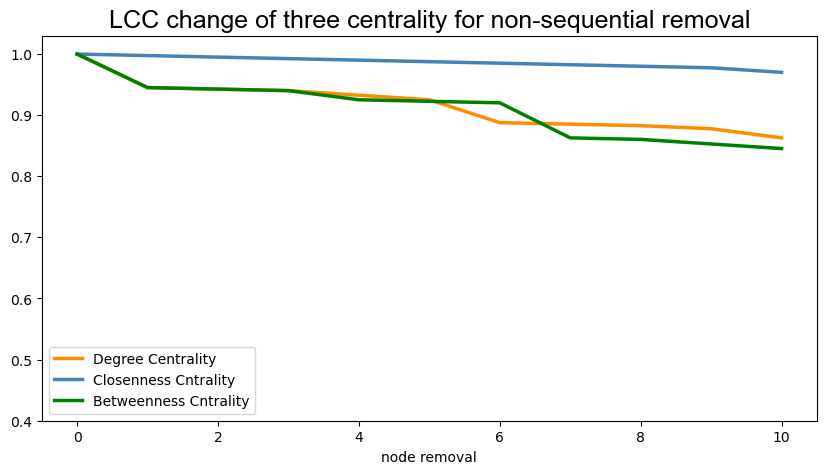

In [167]:
plt.show()

In [168]:
# LCC
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("LCC change of three centrality for sequential removal",fontname="Arial",fontsize=18)

# Line chart 1: Degree Centrality
sns.lineplot(data=LCC_D1, label="Degree Centrality", color="darkorange",linewidth=2.5)

# Line chart 2: Closenness Centrality
sns.lineplot(data=LCC_C1, label="Closenness Cntrality", color="steelblue",linewidth=2.5)

# Line chart 2: Betweenness Centrality
sns.lineplot(data=LCC_B1, label="Betweenness Cntrality", color="green",linewidth=2.5)

#add range of axis
plt.ylim([0.4, 1.03])

# Add label for horizontal axis
plt.xlabel("node removal")
plt.savefig('LCC1.png')

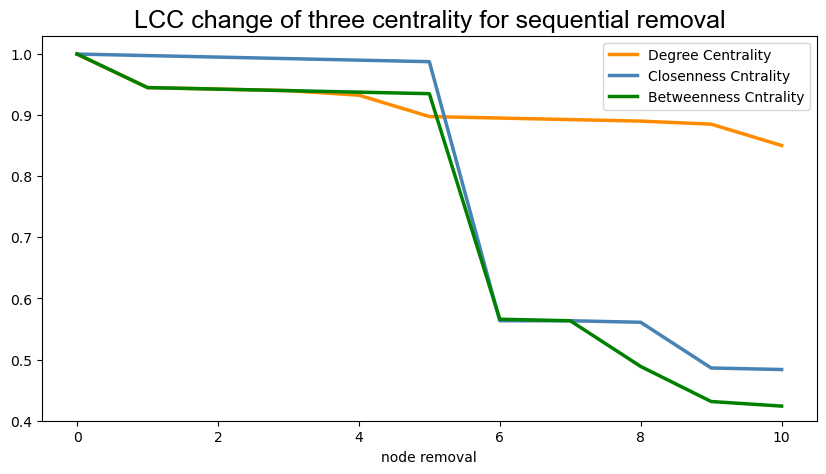

In [169]:
plt.show()

## 1.4.2 EFF

In [170]:
# EFF
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Efficiency change of three centrality for non-sequential removal",fontname="Arial",fontsize=18)

# Line chart 1: Degree Centrality
sns.lineplot(data=EFF_D, label="Degree Centrality", color="darkorange",linewidth=2.5)

# Line chart 2: Closenness Centrality
sns.lineplot(data=EFF_C, label="Closenness Cntrality", color="steelblue",linewidth=2.5)

# Line chart 2: Betweenness Centrality
sns.lineplot(data=EFF_B, label="Betweenness Cntrality", color="green",linewidth=2.5)

#add range of axis
plt.ylim([0.03, 0.110])

# Add label for horizontal axis
plt.xlabel("node removal")
plt.savefig('EFF1.png')

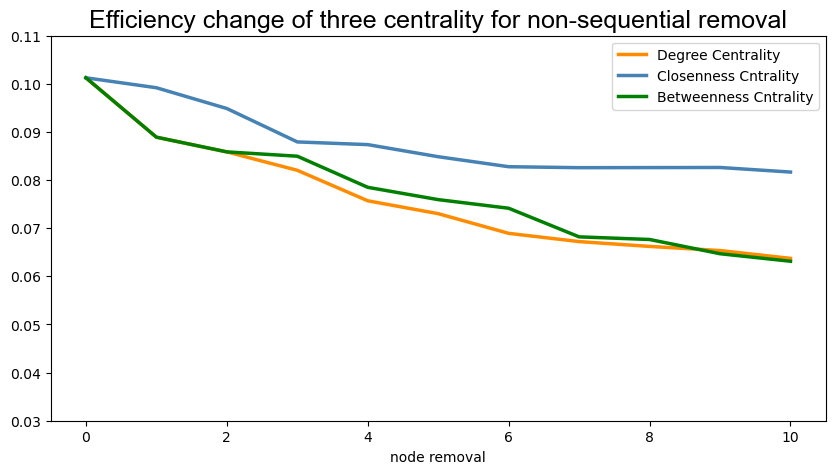

In [171]:
plt.show()

In [172]:
# EFF
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Efficiency change of three centrality for sequential removal",fontname="Arial",fontsize=18)

# Line chart 1: Degree Centrality
sns.lineplot(data=EFF_D1, label="Degree Centrality", color="darkorange",linewidth=2.5)

# Line chart 2: Closenness Centrality
sns.lineplot(data=EFF_C1, label="Closenness Cntrality", color="steelblue",linewidth=2.5)

# Line chart 2: Betweenness Centrality
sns.lineplot(data=EFF_B1, label="Betweenness Cntrality", color="green",linewidth=2.5)

#add range of axis
plt.ylim([0.03, 0.110])

# Add label for horizontal axis
plt.xlabel("node removal")
plt.savefig('EFF2.png')

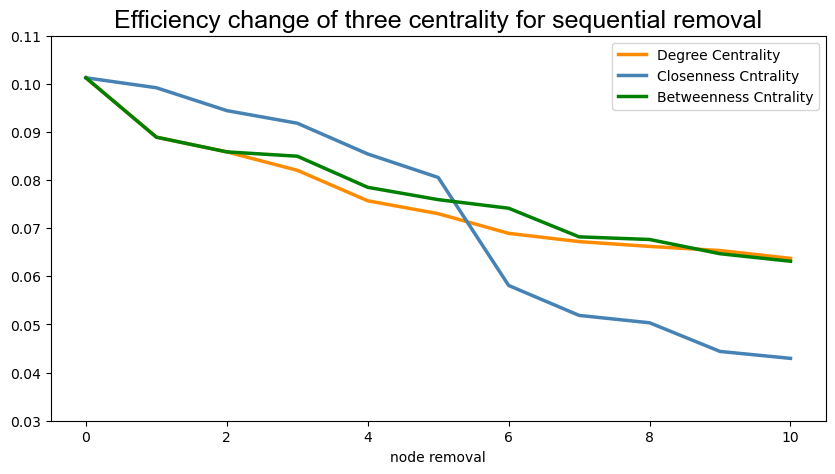

In [173]:
plt.show()

## 1.4.3. Clustering coefficient

In [174]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Cluster Coefficient of three centrality for non-sequential removal",fontname="Arial",fontsize=18)

# Line chart 1: Degree Centrality
sns.lineplot(data=D_coeff, label="Degree Centrality", color="darkorange",linewidth=2.5)

# Line chart 2: Closenness Centrality
sns.lineplot(data=C_coeff, label="Closenness Cntrality", color="steelblue",linewidth=2.5)

# Line chart 2: Betweenness Centrality
sns.lineplot(data=B_coeff, label="Betweenness Cntrality", color="green",linewidth=2.5)

# Add label for horizontal axis
plt.xlabel("node removal")
plt.savefig('CLU1.png')

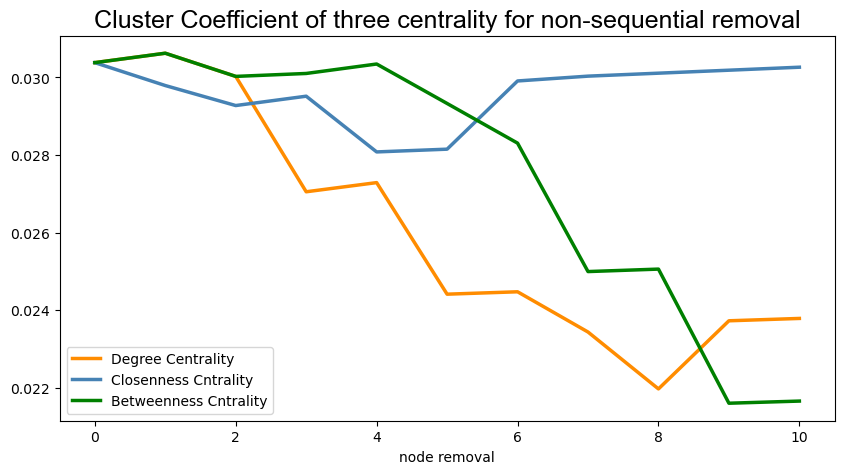

In [175]:
plt.show()

In [176]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Cluster Coefficient of three centrality for sequential removal",fontname="Arial",fontsize=18)

# Line chart 1: Degree Centrality
sns.lineplot(data=D_coeff1, label="Degree Centrality", color="darkorange",linewidth=2.5)

# Line chart 2: Closenness Centrality
sns.lineplot(data=C_coeff1, label="Closenness Cntrality", color="steelblue",linewidth=2.5)

# Line chart 2: Betweenness Centrality
sns.lineplot(data=B_coeff1, label="Betweenness Cntrality", color="green",linewidth=2.5)

plt.legend(loc='lower left')

# Add label for horizontal axis
plt.xlabel("node removal")
plt.savefig('CLU2.png')

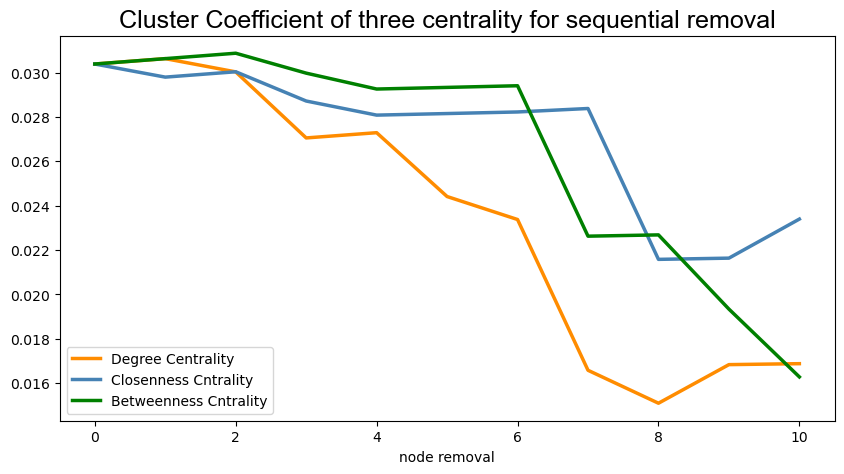

In [177]:
plt.show()

# 2.Weighted Networks

# 2.1. choose betweenness centrality for weighted Networks

In [178]:
# remove the 0 and Nan value
c_w={}
for e1, e2, flow in london_network.edges(data='flows'):
    if flow ==0:
        flow = 0.000000001
        print(flow)
    else:
        flow==flow
    flow=1/flow
    c_w[e1,e2] =flow
nx.set_edge_attributes(london_network,c_w,'flows_c')

1e-09
1e-09
1e-09


In [179]:
#calculate betweenness centrality

bet_london_w =nx.betweenness_centrality(london_network, weight='flows_c',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(london_network,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df1_w = pd.DataFrame(index=london_network.nodes())
df1_w['betweenness_w'] = pd.Series(nx.get_node_attributes(london_network, 'betweenness_w'))

df_sorted1_w = df1_w.sort_values(["betweenness_w"], ascending=False)
df_sorted1_w[0:10]

,betweenness_w
Green Park,45690.0
Bank and Monument,40322.0
Waterloo,33231.0
Westminster,30433.0
Liverpool Street,26878.0
Stratford,26437.0
Bond Street,23288.0
Euston,22682.0
Oxford Circus,21607.0
Warren Street,20292.0


## 2.2. Global efficiency

In [180]:
#remove the node by weighted measure
network_2_3=london_network.copy()
network_2_3.remove_node('Green Park')

In [188]:
#remove the node by unweighted measure
network_2_3_1=london_network.copy()
network_2_3_1.remove_node('Stratford')

In [182]:
from networkx.algorithms import all_pairs_dijkstra_path_length
from networkx import NetworkXNoPath

In [183]:
def global_efficiency_w(G,weight):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        lengths = nx.all_pairs_dijkstra_path_length(G,weight=weight)
        g_eff = 0
        for source, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        g_eff /= denom
        #g_eff = sum(1 / d for s, tgts in lengths
                          #for t, d in tgts.items() if d > 0) / denom
    else:
        g_eff = 0
    # TODO This can be made more efficient by computing all pairs shortest
    # path lengths in parallel.
    return g_eff

In [212]:
g1=global_efficiency_w(london_network,'flows_c')

In [213]:
g2=global_efficiency_w(network_2_3,'flows_c')

In [214]:
g3=global_efficiency_w(network_2_3_1,'flows_c')
g3

6.986567688431669e-06

## 2.3. clustering coefficient

In [186]:
# let's measure the clustering coefficient
c = nx.clustering(london_network, weight="flows")
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg1 = sum([i[1] for i in c]) / len(c)
c_avg1=nx.average_clustering(london_network,weight="flows")
print(f'avg clustering coefficient: {c_avg1}')

<class 'dict'>
[('Moorgate', 0.06264537829986778), ('Bond Street', 0.056203082195416844), ('Marylebone', 0.040680351741593394), ('Gloucester Road', 0.03165337869032195), ('High Street Kensington', 0.03165337869032195)]
avg clustering coefficient: 0.0015791877116043112


In [187]:
# let's measure the clustering coefficient
c = nx.clustering(network_2_3, weight="flows")
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg2 = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg2}')


<class 'dict'>
[('Moorgate', 0.06264537829986778), ('Westminster', 0.061704743274641004), ('Marylebone', 0.040680351741593394), ('Gloucester Road', 0.03165337869032195), ('High Street Kensington', 0.03165337869032195)]
avg clustering coefficient: 0.001318147547008999


In [191]:
c = nx.clustering(network_2_3_1, weight="flows")
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg3 = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg3}')

<class 'dict'>
[('Moorgate', 0.06264537829986778), ('Bond Street', 0.056203082195416844), ('Marylebone', 0.040680351741593394), ('Liverpool Street', 0.03758722697992067), ('Gloucester Road', 0.03165337869032195)]
avg clustering coefficient: 0.0016156156374706463


## 2.4. Visualization

In [197]:
clu_val=[c_avg1,c_avg2,c_avg3]
clu_val=pd.DataFrame({'val':clu_val})
clu_val['c']=["original","weighted","unweighted"]
clu_val

,val,c
0,0.001579,original
1,0.001318,weighted
2,0.001616,unweighted


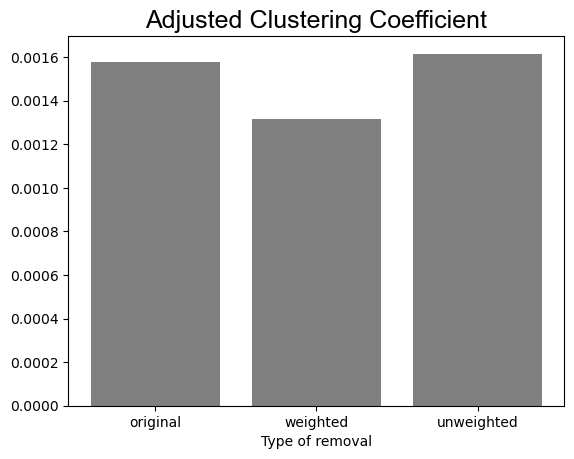

In [199]:
plt.title("Adjusted Clustering Coefficient",fontname="Arial",fontsize=18)
plt.bar(clu_val['c'],clu_val['val'],color='grey')
#plt.ylim(0,0.002)
#plt.ylim(0.000000000000007,0.0000000000000078)
plt.xlabel("Type of removal")
plt.savefig('cluster.png')
plt.show()

In [215]:
eff_val=[float(g1),float(g2),float(g3)]
eff_val=pd.DataFrame({'val':eff_val})
eff_val['c']=['original','weighted','unweighted']
eff_val

,val,c
0,0.000007,original
1,0.000007,weighted
2,0.000007,unweighted


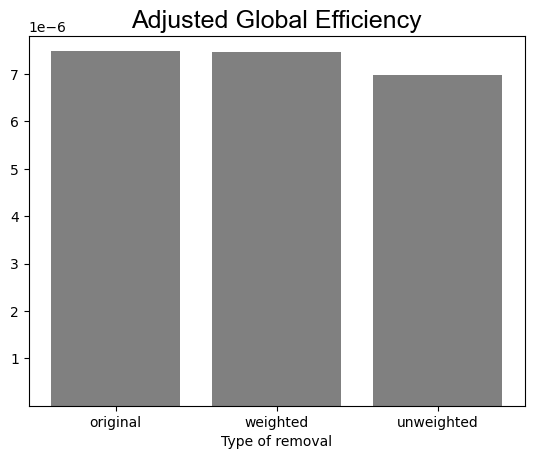

In [226]:
plt.title("Adjusted Global Efficiency",fontname="Arial",fontsize=18)
plt.bar(eff_val['c'],eff_val['val'],color='grey')
#plt.ylim(0.000000000007,0.0000078)
plt.xlabel("Type of removal")
plt.savefig('efficiency.png')
plt.show()

# 3.Spatial Interaction models

In [351]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt
import math

# Data Cleaning

In [352]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [353]:
london_data=London_data.copy()
london_data

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [354]:
# remove NaN values including intra flows
london_data_new = london_data[london_data["station_origin"] != london_data["station_destination"]]
london_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61456 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61456 non-null  object 
 1   station_destination  61456 non-null  object 
 2   flows                61456 non-null  int64  
 3   population           61456 non-null  int64  
 4   jobs                 61456 non-null  int64  
 5   distance             61456 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [355]:
london_data_new['distance']=london_data_new.apply(lambda x: 0 if x['distance']==0 else x['distance'],axis=1)
london_data_new['jobs']=london_data_new.apply(lambda x: 0 if x['jobs']==0 else x['jobs'],axis=1)
london_data_new.info()

/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61456 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61456 non-null  object 
 1   station_destination  61456 non-null  object 
 2   flows                61456 non-null  int64  
 3   population           61456 non-null  int64  
 4   jobs                 61456 non-null  int64  
 5   distance             61456 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [356]:
#log variables
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_data_new[f"log_{x}"] = np.log(london_data_new[x])
    log_x_vars.append(f"log_{x}")

/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [357]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(london_data_new.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
london_data_new = london_data_new.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_data_new.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
london_data_new = london_data_new.merge(D_j, on = "station_destination", how = "left" )

In [358]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428
...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893


In [359]:
london_data_new.replace([np.inf, -np.inf], np.nan,inplace = True)
london_data_new=london_data_new.dropna()
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428
...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893


# Testing with every model

In [16]:
london_data_new1=london_data_new.copy()

In [17]:
formula1 = 'flows ~ (log_population + log_jobs + log_distance-1)'
formula1_1='flows ~ (log_population + log_jobs + distance-1)'
formula2 = 'flows ~ station_origin + log_jobs + log_distance-1'
formula2_1='flows ~ station_origin + log_jobs + distance-1'
formula3 = 'flows ~ station_destination + log_population + log_distance-1'
formula3_1='flows ~ station_destination + log_population + distance-1'
formula4 = 'flows ~ station_destination + station_origin + log_distance-1'
formula4_1='flows ~ station_destination + station_origin + distance-1'

formulas=formula1,formula1_1,formula2,formula2_1,formula3,formula3_1,formula4,formula4_1

In [26]:
resultr=[]
resultm=[]
for formula in formulas:
    result=smf.glm(formula = formula, data=london_data_new1, family=sm.families.Poisson()).fit()
    predictions1 = result.get_prediction()
    predictions1_summary_frame = predictions1.summary_frame()
    london_data_new1["result"] = round(predictions1_summary_frame["mean"],0)
    r1=CalcRSquared(london_data_new1["flows"], london_data_new1["result"])
    r2=CalcRMSE(london_data_new1["flows"], london_data_new1["result"])
    resultr.append(r1)
    resultm.append(r2)

In [27]:
resultr

[0.24643850340413317,
 0.17346185794608532,
 0.38827639501786254,
 0.46806484435428736,
 0.34993238409399136,
 0.3999541955624849,
 0.4076853229296063,
 0.4978427414632336]

In [28]:
resultm

[114.26, 120.843, 102.893, 96.263, 106.013, 102.168, 101.335, 93.401]

In [50]:
resultr1=pd.DataFrame({'Rsquare':resultr})
resultr1['model']=["unconstrained_pl","unconstrained_ne","production_pl","production_ne","attraction_pl","attraction_ne", "doubly_pl","doubly_ne"]
resultr1

,Rsquare,model
0,0.246439,unconstrained_pl
1,0.173462,unconstrained_ne
2,0.388276,production_pl
3,0.468065,production_ne
4,0.349932,attraction_pl
5,0.399954,attraction_ne
6,0.407685,doubly_pl
7,0.497843,doubly_ne


<Figure size 640x480 with 0 Axes>

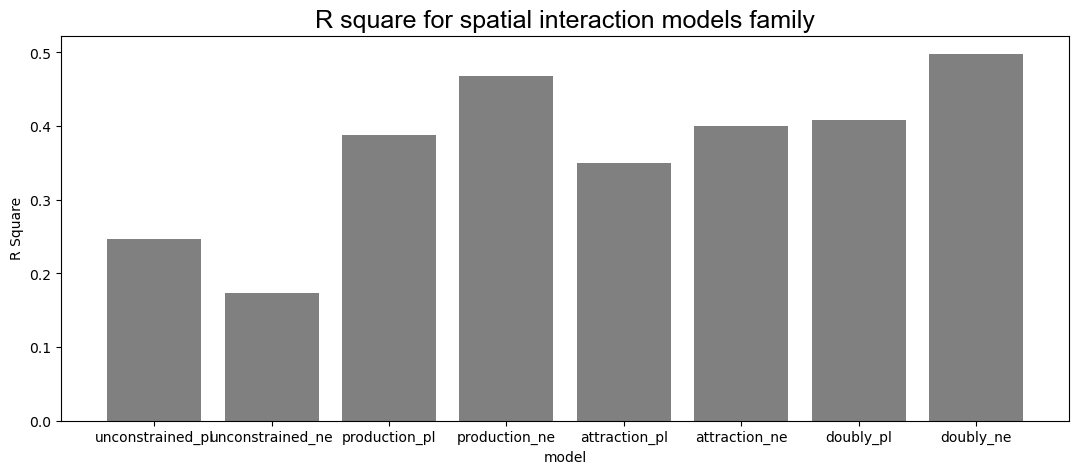

In [57]:
plt.figure(figsize=(13,5))
plt.title("R square for spatial interaction models family",fontname="Arial",fontsize=18)
plt.bar(resultr1['model'],resultr1['Rsquare'],color='grey')
plt.xlabel("model")
plt.ylabel("R Square")
plt.savefig('RSquare.png')
plt.show()

In [53]:
resultr2=pd.DataFrame({'RMSE':resultm})
resultr2['model']=["unconstrained_pl","unconstrained_ne","production_pl","production_ne","attraction_pl","attraction_ne", "doubly_pl","doubly_ne"]
resultr2

,RMSE,model
0,114.260,unconstrained_pl
1,120.843,unconstrained_ne
2,102.893,production_pl
3,96.263,production_ne
4,106.013,attraction_pl
5,102.168,attraction_ne
6,101.335,doubly_pl
7,93.401,doubly_ne


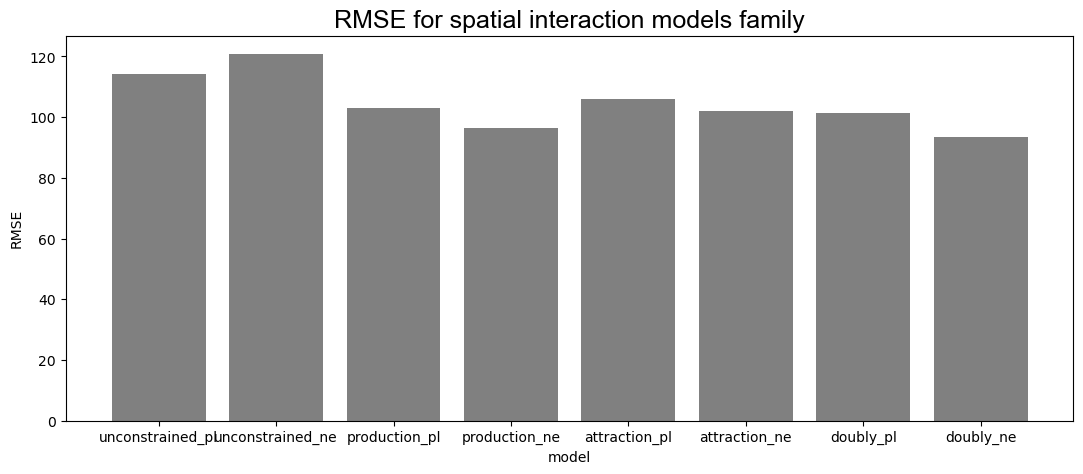

In [58]:
plt.figure(figsize=(13,5))
plt.title("RMSE for spatial interaction models family",fontname="Arial",fontsize=18)
plt.bar(resultr1['model'],resultr2['RMSE'],color='grey')
plt.xlabel("model")
plt.ylabel("RMSE")
plt.savefig('RMSE.png')
plt.show()

## doubly constrained model negative exponential presents the best

In [360]:
# doubly constrained model!
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form1 = 'flows ~ station_destination + station_origin + distance'
#run a doubly constrained sim
doubSim1 = smf.glm(formula = dbl_form1, data=london_data_new, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
#print(doubSim1.summary())

In [361]:
#get the estimates
london_data_new["doubsimfitted1"] = np.round(doubSim1.mu)
#here's the matrix
cdatasubmat1 = london_data_new.pivot_table(values ="doubsimfitted1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat1

/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,603.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,11.0,10.0,NaN,17.0,0.0,NaN,12.0,...,40.0,4.0,2.0,19.0,NaN,0.0,NaN,1.0,NaN,3752.0
Aldgate,NaN,NaN,1.0,NaN,32.0,NaN,NaN,0.0,NaN,23.0,...,7.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2883.0
Aldgate East,NaN,NaN,2.0,38.0,NaN,NaN,0.0,0.0,NaN,24.0,...,7.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,38.0,44.0,NaN,NaN,NaN,NaN,25.0,...,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,2.0,17.0,15.0,NaN,0.0,NaN,NaN,25.0,...,10.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [362]:
CalcRSquared(london_data_new["flows"],london_data_new["doubsimfitted1"])

0.4978427414632336

In [363]:
CalcRMSE(london_data_new["flows"],london_data_new["doubsimfitted1"])

93.401

In [364]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,77.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,112.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342,185.0
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487,176.0
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400,27.0
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893,132.0


In [365]:

# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

## Iteration of doubly constrain models

In [366]:
# Use the beta we got from the negative exponential model
beta = -doubSim1.params[-1]
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
london_data_new = balance_doubly_constrained(london_data_new,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
london_data_new['SIM_est_exp2'] = np.round(london_data_new['O_i'] * london_data_new['Ai_exp'] * london_data_new['D_j'] * london_data_new['Bj_exp'] * 
                                   np.exp(london_data_new['distance']*-beta))
# Check out the matrix
pd.pivot_table(london_data_new,values='SIM_est_exp2',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


In [367]:
beta

0.00015436969215720304

# Try production-constrained model (ne)

In [368]:
formula_attr2 = 'flows ~ station_origin + log_jobs + distance-1'
prosim_p = smf.glm(formula = formula_attr2, data=london_data_new, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
#print(attrSim.summary())

In [369]:
#create a coefficients dataframe from the attrSim model
coefs = pd.DataFrame(prosim_p.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
#replace the unnecessary DestCodeNew and [] in the
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
london_data_new = london_data_new.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
london_data_new.drop(columns = ["coef"], inplace = True)
#then once you have done this you can join them back into the dataframes
london_data_new.head()

/Users/willowliu/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,77.0,0.000008,0.743537,77.0,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.0,0.000008,4.880997,3.0,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,4.0,0.000008,2.138565,4.0,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,112.0,0.000008,0.904224,112.0,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,48.0,0.000008,0.946081,48.0,-2.914322


In [370]:
#get the estimates
london_data_new["prosimfit_p"] = np.round(prosim_p.mu)

r1=CalcRSquared(london_data_new["flows"],london_data_new["prosimfit_p"])
r2=CalcRMSE(london_data_new["flows"],london_data_new["prosimfit_p"])
print(r1,r2)

0.46806484435428736 96.263


In [371]:
#first round the estimates
london_data_new["prosimfit_p"] = round(london_data_new["prosimfit_p"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
londonsubmatattrp = london_data_new.pivot_table(values ="prosimfit_p", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
londonsubmatattrp

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3100.0


# 3.1. Scenario A!

In [372]:
#Scenaria A
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"]*0.5
    else:
        val = row["jobs"]
    return val

london_data_new["scenarioA"] = london_data_new.apply(new_sal, axis =1)

x_variables = ["scenarioA"]
log_x_vars = []

In [373]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i,prosimfit_p,scenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,77.0,0.000008,0.743537,77.0,-2.914322,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.0,0.000008,4.880997,3.0,-2.914322,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,4.0,0.000008,2.138565,4.0,-2.914322,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,112.0,0.000008,0.904224,112.0,-2.914322,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,48.0,0.000008,0.946081,48.0,-2.914322,56.0,15428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342,185.0,0.000017,3.211829,185.0,0.518041,99.0,3342.0
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487,176.0,0.000017,0.899193,176.0,0.518041,295.0,5487.0
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400,27.0,0.000017,2.118110,27.0,0.518041,36.0,400.0
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893,132.0,0.000017,2.467993,132.0,0.518041,125.0,893.0


In [374]:
london_data_new[['station_origin','station_destination','alpha_i','scenarioA','distance']]

,station_origin,station_destination,alpha_i,scenarioA,distance
0,Abbey Road,Bank and Monument,-2.914322,78549.0,8131.525097
1,Abbey Road,Beckton,-2.914322,442.0,8510.121774
2,Abbey Road,Blackwall,-2.914322,665.0,3775.448872
3,Abbey Road,Canary Wharf,-2.914322,29386.0,5086.514220
4,Abbey Road,Canning Town,-2.914322,15428.0,2228.923167
...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,0.518041,3342.0,13401.795549
61409,Woolwich Arsenal,West Ham,0.518041,5487.0,8701.454361
61410,Woolwich Arsenal,West India Quay,0.518041,400.0,9536.720451
61411,Woolwich Arsenal,West Silvertown,0.518041,893.0,5355.248554


In [477]:
alpha_i = prosim_p.params[0:397]
gamma = prosim_p.params[398]
beta = -prosim_p.params[399]

In [478]:
gamma

0.7552215895688535

In [479]:
beta

0.000153166193463546

In [377]:
london_data_new["scenaria_est"] = np.exp(london_data_new["alpha_i"]+gamma*np.log(london_data_new["scenarioA"]) - beta*london_data_new["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
#as we don't want half a person
london_data_new["scenaria_est"] = round(london_data_new["scenaria_est"],0)
#now we can convert the pivot table into a matrix
#called cdatasubmat7
ScenariaA_est = london_data_new.pivot_table(values ="scenaria_est", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)

#display the results
ScenariaA_est

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,555.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3730.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2854.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4765.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3083.0


In [378]:
### total flows infcrease
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i,prosimfit_p,scenarioA,scenaria_est
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,77.0,0.000008,0.743537,77.0,-2.914322,78.0,78549.0,78.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.0,0.000008,4.880997,3.0,-2.914322,1.0,442.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,4.0,0.000008,2.138565,4.0,-2.914322,4.0,665.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,112.0,0.000008,0.904224,112.0,-2.914322,99.0,29386.0,59.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,48.0,0.000008,0.946081,48.0,-2.914322,56.0,15428.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342,185.0,0.000017,3.211829,185.0,0.518041,99.0,3342.0,99.0
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487,176.0,0.000017,0.899193,176.0,0.518041,295.0,5487.0,295.0
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400,27.0,0.000017,2.118110,27.0,0.518041,36.0,400.0,36.0
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893,132.0,0.000017,2.467993,132.0,0.518041,125.0,893.0,125.0


In [379]:
#calculate some new wj^alpha and d_ij^beta values
jobs_gamma = london_data_new["jobs"]**gamma
dist_beta = math.e **(london_data_new["distance"]*-beta)
#calcualte the first stage of the Ai values
london_data_new["Ai1"] = jobs_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_data_new.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
london_data_new = london_data_new.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [380]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,doubsimfitted1,Ai_exp,Bj_exp,SIM_est_exp2,alpha_i,prosimfit_p,scenarioA,scenaria_est,Ai1,A_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,...,77.0,0.000008,0.743537,77.0,-2.914322,78.0,78549.0,78.0,1432.231104,0.000091
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,...,3.0,0.000008,4.880997,3.0,-2.914322,1.0,442.0,1.0,27.026714,0.000091
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,...,4.0,0.000008,2.138565,4.0,-2.914322,4.0,665.0,4.0,75.982904,0.000091
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,...,112.0,0.000008,0.904224,112.0,-2.914322,99.0,29386.0,59.0,1834.127323,0.000091
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,...,48.0,0.000008,0.946081,48.0,-2.914322,56.0,15428.0,56.0,1034.750388,0.000091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,...,185.0,0.000017,3.211829,185.0,0.518041,99.0,3342.0,99.0,58.874685,0.000213
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,...,176.0,0.000017,0.899193,176.0,0.518041,295.0,5487.0,295.0,175.878367,0.000213
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,...,27.0,0.000017,2.118110,27.0,0.518041,36.0,400.0,36.0,21.416897,0.000213
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,...,132.0,0.000017,2.467993,132.0,0.518041,125.0,893.0,125.0,74.528041,0.000213


In [381]:
#to check that everything works, recreate the original estimates
#using equation 5 above and assign to attrsimest3
london_data_new["prosimest_c"] = london_data_new["A_i"]*london_data_new["O_i"]*jobs_gamma*dist_beta

#round
london_data_new["prosimest_c"] = round(london_data_new["prosimest_c"])
#check
london_data_new[["prosimfit_p", "prosimest_c"]]
#check the head of the results

,prosimfit_p,prosimest_c
0,78.0,78.0
1,1.0,1.0
2,4.0,4.0
3,99.0,99.0
4,56.0,56.0
...,...,...
61408,99.0,99.0
61409,295.0,295.0
61410,36.0,36.0
61411,125.0,125.0


In [382]:
#calculate some new wj^alpha and d_ij^beta values
jobs2_gamma = london_data_new["scenarioA"]**gamma
#calcualte the first stage of the Ai values
london_data_new["Ai1"] = jobs2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_data_new.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
london_data_new = london_data_new.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [383]:
#to check everything works, recreate the original estimates
london_data_new["scenarioA_est_F"] = london_data_new["A_i2"]*london_data_new["O_i"]*jobs2_gamma*dist_beta
#round
london_data_new["scenarioA_est_F"] = round(london_data_new["scenarioA_est_F"])

In [384]:
ScenarioA_Final = london_data_new.pivot_table(values ="scenarioA_est_F", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
ScenarioA_Final

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3750.0
Aldgate,NaN,NaN,1.0,NaN,38.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,1.0,41.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4860.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3102.0


In [385]:
london_data_new['change_A']=london_data_new["scenarioA_est_F"]-london_data_new["prosimfit_p"]
visualization_A=london_data_new[["station_origin","station_destination","prosimfit_p","scenarioA_est_F","change_A"]]

In [386]:
visualization_A

,station_origin,station_destination,prosimfit_p,scenarioA_est_F,change_A
0,Abbey Road,Bank and Monument,78.0,83.0,5.0
1,Abbey Road,Beckton,1.0,2.0,1.0
2,Abbey Road,Blackwall,4.0,4.0,0.0
3,Abbey Road,Canary Wharf,99.0,63.0,-36.0
4,Abbey Road,Canning Town,56.0,60.0,4.0
...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,99.0,107.0,8.0
61409,Woolwich Arsenal,West Ham,295.0,320.0,25.0
61410,Woolwich Arsenal,West India Quay,36.0,39.0,3.0
61411,Woolwich Arsenal,West Silvertown,125.0,135.0,10.0


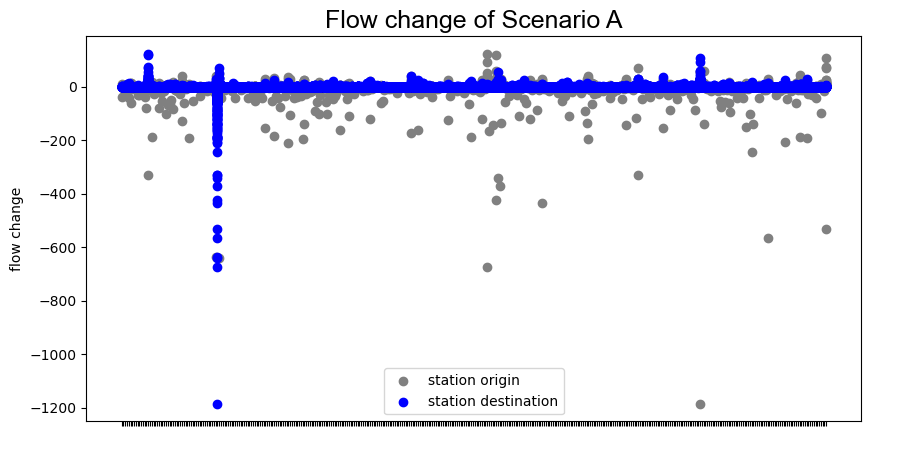

In [475]:
plt.figure(figsize=(10,5))
plt.title("Flow change of Scenario A",fontname="Arial",fontsize=18)
plt.scatter(visualization_A['station_origin'],visualization_A['change_A'],color='grey',label='station origin')
plt.scatter(visualization_A['station_destination'],visualization_A['change_A'],color='blue', label='station destination')
plt.xticks(color='w') 
plt.legend()
plt.ylabel("flow change")
plt.savefig('scenarioA')
plt.show()

In [503]:
#Decease most value
A_sorted=visualization_A.sort_values(by=['change_A'],ascending=True)[0:10]
A_sorted1=A_sorted[A_sorted['station_destination'].str.contains("Canary Wharf")]
A_sorted1['line']=A_sorted1['station_origin']+" to "+A_sorted1['station_destination']
A_sorted1

,station_origin,station_destination,prosimfit_p,scenarioA_est_F,change_A,line
49894,Stratford,Canary Wharf,3002.0,1816.0,-1186.0,Stratford to Canary Wharf
31665,Lewisham,Canary Wharf,1981.0,1308.0,-673.0,Lewisham to Canary Wharf
9124,Canning Town,Canary Wharf,1655.0,1013.0,-642.0,Canning Town to Canary Wharf
8516,Canada Water,Canary Wharf,1623.0,986.0,-637.0,Canada Water to Canary Wharf
55915,Waterloo,Canary Wharf,1400.0,836.0,-564.0,Waterloo to Canary Wharf
61381,Woolwich Arsenal,Canary Wharf,1481.0,950.0,-531.0,Woolwich Arsenal to Canary Wharf
36318,North Greenwich,Canary Wharf,1140.0,705.0,-435.0,North Greenwich to Canary Wharf
32234,Limehouse,Canary Wharf,1217.0,795.0,-422.0,Limehouse to Canary Wharf
32609,London Bridge,Canary Wharf,923.0,553.0,-370.0,London Bridge to Canary Wharf
32311,Liverpool Street,Canary Wharf,850.0,509.0,-341.0,Liverpool Street to Canary Wharf


In [504]:
#increase most value
A_sorted2=visualization_A.sort_values(by=['change_A'],ascending=False)[0:10]
A_sorted2['line']=A_sorted2['station_origin']+" to "+A_sorted2['station_destination']
A_sorted2

,station_origin,station_destination,prosimfit_p,scenarioA_est_F,change_A,line
31660,Lewisham,Bank and Monument,1080.0,1204.0,124.0,Lewisham to Bank and Monument
32229,Limehouse,Bank and Monument,1180.0,1301.0,121.0,Limehouse to Bank and Monument
61405,Woolwich Arsenal,Stratford,1320.0,1429.0,109.0,Woolwich Arsenal to Stratford
31693,Lewisham,Stratford,824.0,918.0,94.0,Lewisham to Stratford
61376,Woolwich Arsenal,Bank and Monument,915.0,990.0,75.0,Woolwich Arsenal to Bank and Monument
61382,Woolwich Arsenal,Canning Town,836.0,905.0,69.0,Woolwich Arsenal to Canning Town
44739,Shadwell,Bank and Monument,1231.0,1300.0,69.0,Shadwell to Bank and Monument
50268,Stratford International,Stratford,837.0,897.0,60.0,Stratford International to Stratford
32262,Limehouse,Stratford,573.0,632.0,59.0,Limehouse to Stratford
49857,Stratford,Bank and Monument,2727.0,2784.0,57.0,Stratford to Bank and Monument


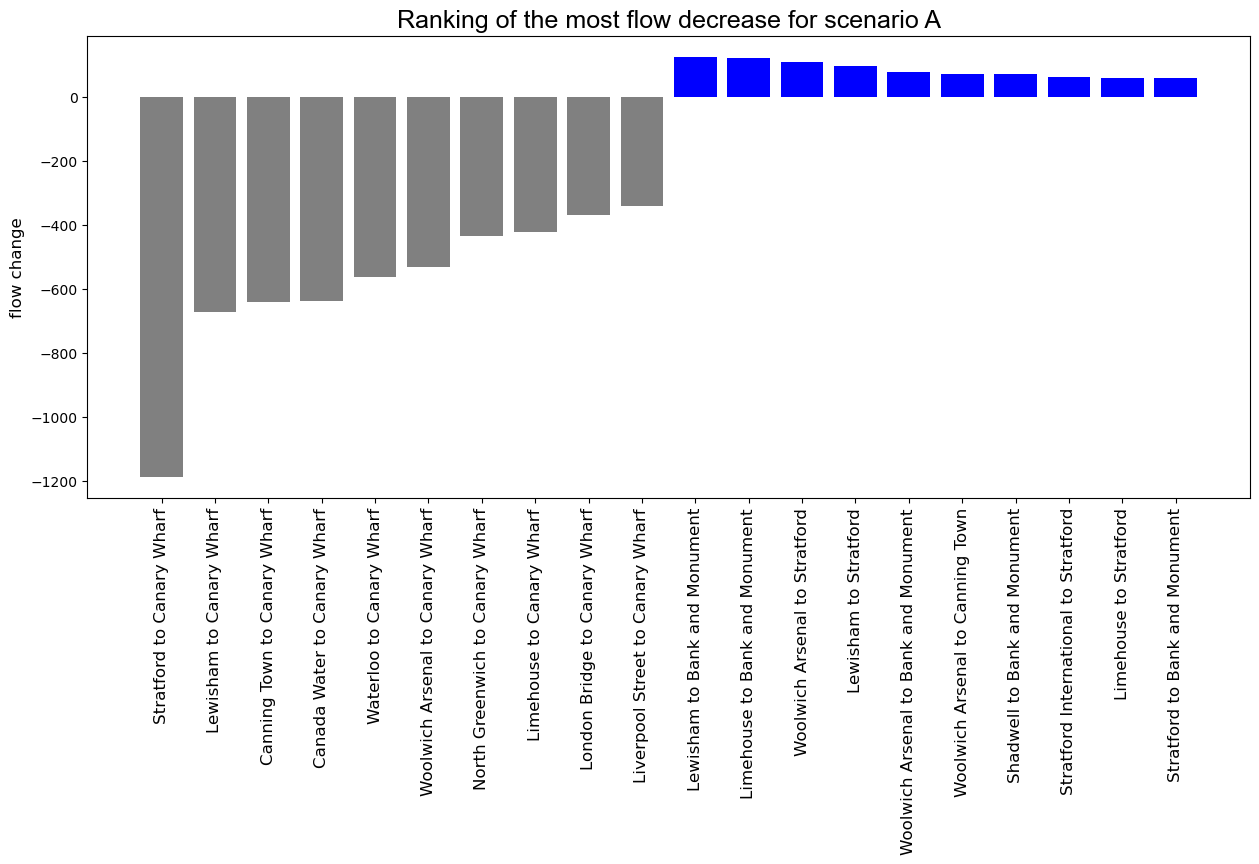

In [509]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Ranking of the most flow decrease for scenario A",fontname="Arial",fontsize=18)
plt.bar(A_sorted1['line'],A_sorted['change_A'],color='grey',orientation='vertical')
plt.bar(A_sorted2['line'],A_sorted2['change_A'],color='blue',orientation='vertical')
#plt.xticks(ticks=range(len(A_sorted['station_origin'])), rotation=90)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("flow change",fontsize=12)
plt.savefig('ranking_A')
plt.show()

# 3.2.Scenario B!

## 3.2.1.set beta value as 0.0002

In [407]:
beta_d = -doubSim1.params[-1]

In [408]:
beta_B1=beta_d*1.5
beta_B1

0.00023155453823580456

In [409]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,alpha_i,prosimfit_p,scenarioA,scenaria_est,Ai1,A_i,prosimest_c,A_i2,scenarioA_est_F,change_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,...,-2.914322,78.0,78549.0,78.0,1432.231104,0.000091,78.0,0.000097,83.0,5.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,...,-2.914322,1.0,442.0,1.0,27.026714,0.000091,1.0,0.000097,2.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,...,-2.914322,4.0,665.0,4.0,75.982904,0.000091,4.0,0.000097,4.0,0.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,...,-2.914322,99.0,29386.0,59.0,1086.638601,0.000091,99.0,0.000097,63.0,-36.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,...,-2.914322,56.0,15428.0,56.0,1034.750388,0.000091,56.0,0.000097,60.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,...,0.518041,99.0,3342.0,99.0,58.874685,0.000213,99.0,0.000230,107.0,8.0
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,...,0.518041,295.0,5487.0,295.0,175.878367,0.000213,295.0,0.000230,320.0,25.0
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,...,0.518041,36.0,400.0,36.0,21.416897,0.000213,36.0,0.000230,39.0,3.0
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,...,0.518041,125.0,893.0,125.0,74.528041,0.000213,125.0,0.000230,135.0,10.0


In [410]:
london_data_new['SIM_est_exp_scB1'] = np.round(london_data_new['O_i'] * london_data_new['Ai_exp'] * london_data_new['D_j'] * london_data_new['Bj_exp'] * 
                                   np.exp(london_data_new['distance']*-beta_B1))
pd.pivot_table(london_data_new,values='SIM_est_exp_scB1',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,431.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,693.0
Acton Town,0,0,0,3,3,0,11,0,0,4,...,12,1,0,11,0,0,0,0,0,1761.0
Aldgate,0,0,0,0,29,0,0,0,0,18,...,2,0,1,1,0,0,0,0,0,2041.0
Aldgate East,0,0,0,34,0,0,0,0,0,18,...,2,0,1,1,0,0,0,0,0,2221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,11,15,0,0,0,0,6,...,1,0,1,0,0,0,0,0,0,1641.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,329.0
Woodside Park,0,0,0,4,4,0,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1075.0


In [411]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,prosimfit_p,scenarioA,scenaria_est,Ai1,A_i,prosimest_c,A_i2,scenarioA_est_F,change_A,SIM_est_exp_scB1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,...,78.0,78549.0,78.0,1432.231104,0.000091,78.0,0.000097,83.0,5.0,41.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,...,1.0,442.0,1.0,27.026714,0.000091,1.0,0.000097,2.0,1.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,...,4.0,665.0,4.0,75.982904,0.000091,4.0,0.000097,4.0,0.0,3.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,...,99.0,29386.0,59.0,1086.638601,0.000091,99.0,0.000097,63.0,-36.0,76.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,...,56.0,15428.0,56.0,1034.750388,0.000091,56.0,0.000097,60.0,4.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,...,99.0,3342.0,99.0,58.874685,0.000213,99.0,0.000230,107.0,8.0,66.0
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,...,295.0,5487.0,295.0,175.878367,0.000213,295.0,0.000230,320.0,25.0,90.0
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,...,36.0,400.0,36.0,21.416897,0.000213,36.0,0.000230,39.0,3.0,13.0
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,...,125.0,893.0,125.0,74.528041,0.000213,125.0,0.000230,135.0,10.0,87.0


In [412]:
# Use the beta we got from the negative exponential model
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
london_data_new = balance_doubly_constrained(london_data_new,'station_origin','station_destination','O_i','D_j','distance',-beta_B1,'exponential','Ai_exp_B','Bj_exp_B')

# Now predict the model again using the new Ai and Dj fields.
london_data_new['SIM_est_exp_B1_F'] = np.round(london_data_new['O_i'] * london_data_new['Ai_exp_B'] * london_data_new['D_j'] * london_data_new['Bj_exp_B'] * 
                                   np.exp(london_data_new['distance']*-beta_B1))

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33


In [413]:
pd.pivot_table(london_data_new,values='SIM_est_exp_B1_F',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,598.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1222.0
Acton Town,0,0,0,6,5,0,17,0,0,8,...,38,3,1,26,0,0,0,0,0,3741.0
Aldgate,0,0,0,0,40,0,0,0,0,25,...,3,0,2,1,0,0,0,0,0,2873.0
Aldgate East,0,0,0,49,0,0,0,0,0,27,...,3,0,2,1,0,0,0,0,0,3159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,38,48,0,0,0,0,21,...,3,0,4,0,0,0,0,0,0,4863.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527.0
Woodside Park,0,0,1,13,11,0,0,0,0,25,...,5,0,2,0,0,0,0,0,0,3089.0


In [414]:
london_data_new

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Ai1,A_i,prosimest_c,A_i2,scenarioA_est_F,change_A,SIM_est_exp_scB1,Ai_exp_B,Bj_exp_B,SIM_est_exp_B1_F
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,...,1432.231104,0.000091,78.0,0.000097,83.0,5.0,41.0,0.000011,0.756150,62.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,...,27.026714,0.000091,1.0,0.000097,2.0,1.0,1.0,0.000011,5.585291,2.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,...,75.982904,0.000091,4.0,0.000097,4.0,0.0,3.0,0.000011,1.741561,3.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,...,1086.638601,0.000091,99.0,0.000097,63.0,-36.0,76.0,0.000011,0.915780,114.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,...,1034.750388,0.000091,56.0,0.000097,60.0,4.0,40.0,0.000011,0.891435,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,...,58.874685,0.000213,99.0,0.000230,107.0,8.0,66.0,0.000039,3.221709,148.0
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,...,175.878367,0.000213,295.0,0.000230,320.0,25.0,90.0,0.000039,0.790873,178.0
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,...,21.416897,0.000213,36.0,0.000230,39.0,3.0,13.0,0.000039,1.728740,23.0
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,...,74.528041,0.000213,125.0,0.000230,135.0,10.0,87.0,0.000039,2.029561,161.0


In [415]:
london_data_new['change_B_1']=london_data_new['doubsimfitted1']-london_data_new['SIM_est_exp_B1_F']
visualization_B=london_data_new[["station_origin","station_destination","doubsimfitted1","SIM_est_exp_B1_F","change_B_1"]]

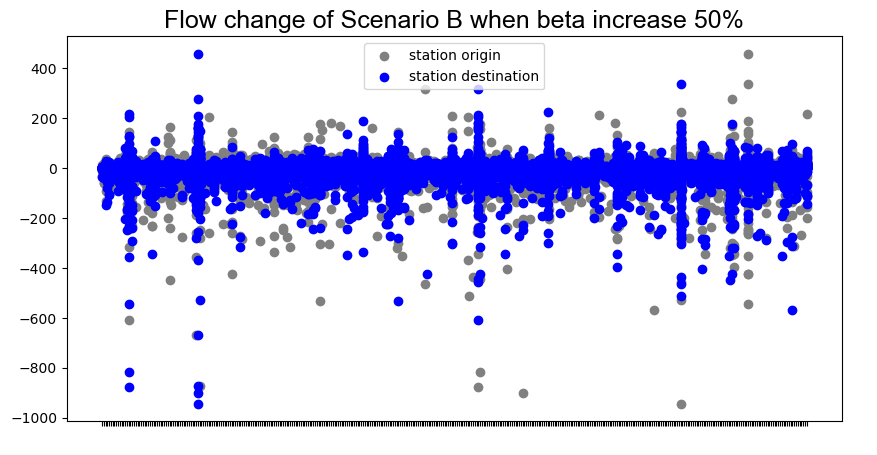

In [526]:
plt.figure(figsize=(10,5))
plt.title("Flow change of Scenario B when beta increase 50%",fontname="Arial",fontsize=18)
plt.scatter(visualization_B['station_origin'],visualization_B['change_B_1'],color='grey',label='station origin')
plt.scatter(visualization_B['station_destination'],visualization_B['change_B_1'],color='blue', label='station destination')
plt.xticks(color='w')
plt.legend()
plt.savefig('ScenarioB')
plt.show()

In [510]:
#etop10 decreas
B_sorted_1=visualization_B.sort_values(by=['change_B_1'],ascending=True)[0:10]
B_sorted_1['line']=B_sorted_1['station_origin']+" to "+B_sorted_1['station_destination']
B_sorted_1

,station_origin,station_destination,doubsimfitted1,SIM_est_exp_B1_F,change_B_1,line
49894,Stratford,Canary Wharf,3747.0,4691.0,-944.0,Stratford to Canary Wharf
36318,North Greenwich,Canary Wharf,1565.0,2466.0,-901.0,North Greenwich to Canary Wharf
32282,Liverpool Street,Bank and Monument,2921.0,3797.0,-876.0,Liverpool Street to Bank and Monument
9124,Canning Town,Canary Wharf,2058.0,2929.0,-871.0,Canning Town to Canary Wharf
32584,London Bridge,Bank and Monument,2962.0,3777.0,-815.0,London Bridge to Bank and Monument
8516,Canada Water,Canary Wharf,2134.0,2803.0,-669.0,Canada Water to Canary Wharf
2712,Bank and Monument,Liverpool Street,1767.0,2377.0,-610.0,Bank and Monument to Liverpool Street
47465,Southfields,Wimbledon,414.0,982.0,-568.0,Southfields to Wimbledon
55890,Waterloo,Bank and Monument,4557.0,5103.0,-546.0,Waterloo to Bank and Monument
18930,Finsbury Park,Highbury & Islington,978.0,1511.0,-533.0,Finsbury Park to Highbury & Islington


In [511]:
#top10 increase
B_sorted_2=visualization_B.sort_values(by=['change_B_1'],ascending=False)[0:10]
B_sorted_2['line']=B_sorted_2['station_origin']+" to "+B_sorted_2['station_destination']
B_sorted_2

,station_origin,station_destination,doubsimfitted1,SIM_est_exp_B1_F,change_B_1,line
55915,Waterloo,Canary Wharf,1949.0,1490.0,459.0,Waterloo to Canary Wharf
56095,Waterloo,Stratford,776.0,440.0,336.0,Waterloo to Stratford
27815,Ilford,Liverpool Street,1460.0,1144.0,316.0,Ilford to Liverpool Street
54638,Victoria,Canary Wharf,837.0,559.0,278.0,Victoria to Canary Wharf
50076,Stratford,Oxford Circus,956.0,732.0,224.0,Stratford to Oxford Circus
61376,Woolwich Arsenal,Bank and Monument,860.0,643.0,217.0,Woolwich Arsenal to Bank and Monument
43478,Romford,Liverpool Street,861.0,649.0,212.0,Romford to Liverpool Street
29772,King's Cross St. Pancras,Canary Wharf,647.0,439.0,208.0,King's Cross St. Pancras to Canary Wharf
31660,Lewisham,Bank and Monument,956.0,750.0,206.0,Lewisham to Bank and Monument
9911,Chadwell Heath,Liverpool Street,905.0,700.0,205.0,Chadwell Heath to Liverpool Street


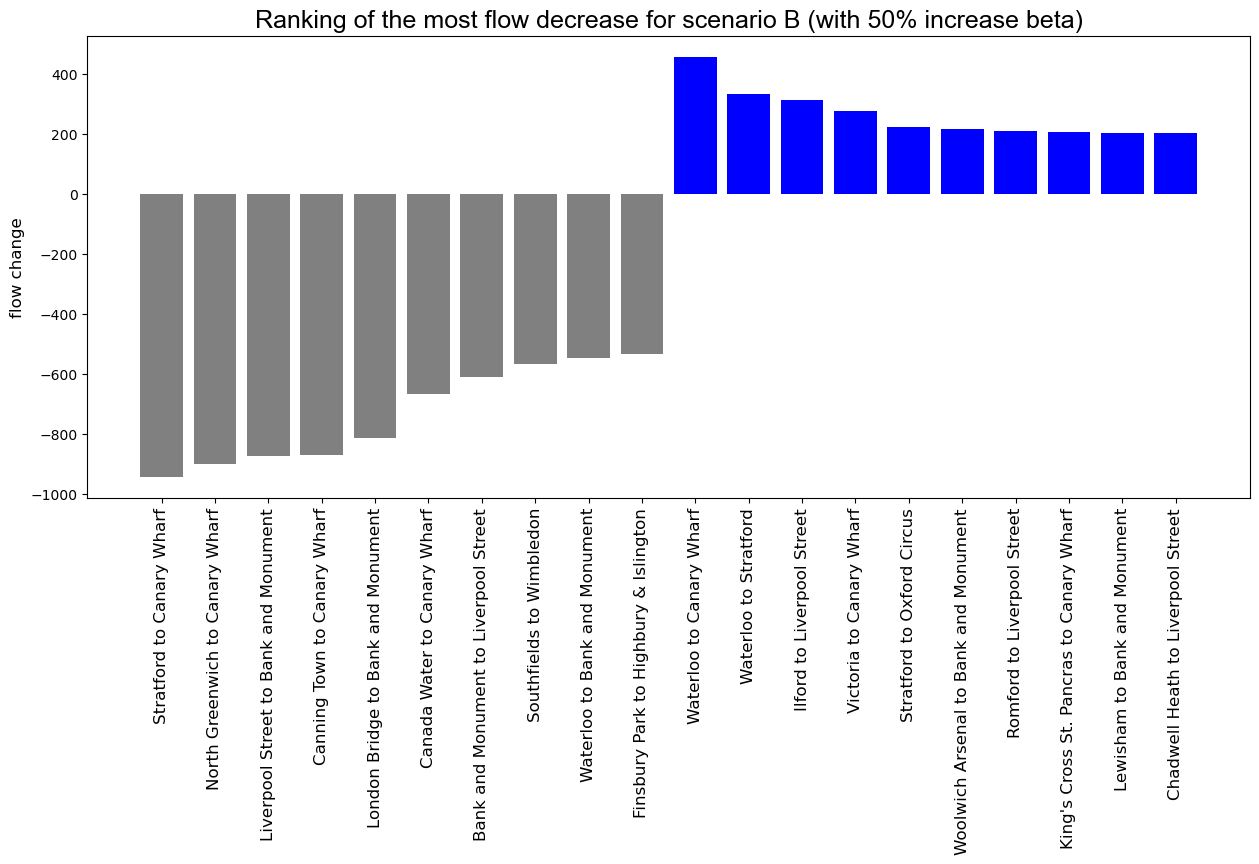

In [514]:
#plot ranking
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Ranking of the most flow decrease for scenario B (with 50% increase beta)",fontname="Arial",fontsize=18)
plt.bar(B_sorted_1['line'],B_sorted_1['change_B_1'],color='grey',orientation='vertical')
plt.bar(B_sorted_2['line'],B_sorted_2['change_B_1'],color='blue',orientation='vertical')
#plt.xticks(ticks=range(len(A_sorted['station_origin'])), rotation=90)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("flow change",fontsize=12)
plt.savefig('ranking_B1')
plt.show()

## 3.2.2.Scenario B2

In [515]:
beta_B2=beta_d*2
beta_B2

0.0003087393843144061

In [516]:
london_data_new['SIM_est_exp_scB2'] = np.round(london_data_new['O_i'] * london_data_new['Ai_exp'] * london_data_new['D_j'] * london_data_new['Bj_exp'] * 
                                   np.exp(london_data_new['distance']*-beta_B2))

In [517]:
pd.pivot_table(london_data_new,values='SIM_est_exp_scB2',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,324.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,458.0
Acton Town,0,0,0,1,1,0,8,0,0,1,...,4,0,0,7,0,0,0,0,0,956.0
Aldgate,0,0,0,0,26,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,1528.0
Aldgate East,0,0,0,30,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,1653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,3,5,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,671.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,230.0
Woodside Park,0,0,0,1,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,461.0


In [425]:
# Use the beta we got from the negative exponential model
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
london_data_new = balance_doubly_constrained(london_data_new,'station_origin','station_destination','O_i','D_j','distance',-beta_B2,'exponential','Ai_exp_B','Bj_exp_B')

# Now predict the model again using the new Ai and Dj fields.
london_data_new['SIM_est_exp_B2_F'] = np.round(london_data_new['O_i'] * london_data_new['Ai_exp_B'] * london_data_new['D_j'] * london_data_new['Bj_exp_B'] * 
                                   np.exp(london_data_new['distance']*-beta_B2))

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48


In [518]:
pd.pivot_table(london_data_new,values='SIM_est_exp_B2_F',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,602.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1220.0
Acton Town,0,0,0,4,3,0,13,0,0,5,...,28,1,0,32,0,0,0,0,0,3749.0
Aldgate,0,0,0,0,48,0,0,0,0,27,...,1,0,1,1,0,0,0,0,0,2881.0
Aldgate East,0,0,0,60,0,0,0,0,0,28,...,1,0,1,1,0,0,0,0,0,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,38,52,0,0,0,0,18,...,1,0,2,0,0,0,0,0,0,4861.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,526.0
Woodside Park,0,0,0,10,8,0,0,0,0,25,...,2,0,1,0,0,0,0,0,0,3089.0


In [519]:
london_data_new['change_B_2']=london_data_new['doubsimfitted1']-london_data_new['SIM_est_exp_B2_F']
visualization_B2=london_data_new[["station_origin","station_destination","doubsimfitted1","SIM_est_exp_B2_F","change_B_2"]]

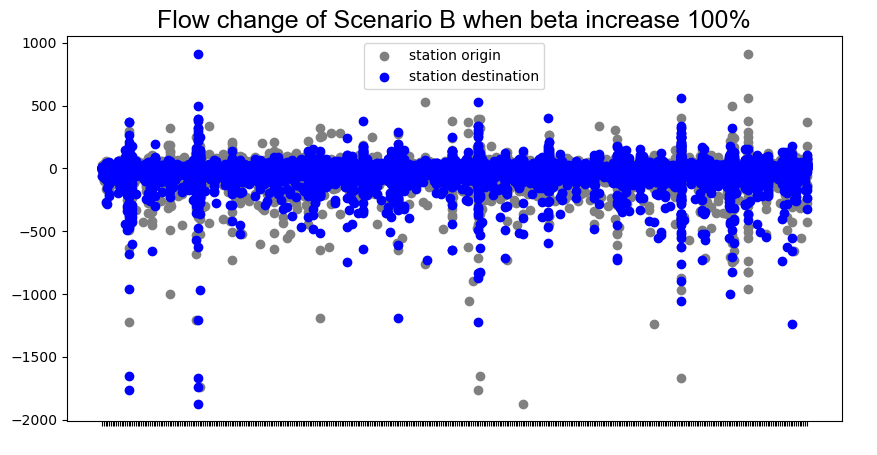

In [528]:
plt.figure(figsize=(10,5))
plt.title("Flow change of Scenario B when beta increase 100%",fontname="Arial",fontsize=18)
plt.scatter(visualization_B2['station_origin'],visualization_B2['change_B_2'],label='station origin',color='grey')
plt.scatter(visualization_B2['station_destination'],visualization_B2['change_B_2'],color='blue', label='station destination')
plt.xticks(color='w') 
plt.legend()
plt.savefig('ScenarioB2')
plt.show()

In [521]:
#top10 decrease
B_sorted_3=visualization_B2.sort_values(by=['change_B_2'],ascending=True)[0:10]
B_sorted_3['line']=B_sorted_3['station_origin']+" to "+B_sorted_3['station_destination']
B_sorted_3

,station_origin,station_destination,doubsimfitted1,SIM_est_exp_B2_F,change_B_2,line
36318,North Greenwich,Canary Wharf,1565.0,3438.0,-1873.0,North Greenwich to Canary Wharf
32282,Liverpool Street,Bank and Monument,2921.0,4682.0,-1761.0,Liverpool Street to Bank and Monument
9124,Canning Town,Canary Wharf,2058.0,3800.0,-1742.0,Canning Town to Canary Wharf
49894,Stratford,Canary Wharf,3747.0,5414.0,-1667.0,Stratford to Canary Wharf
32584,London Bridge,Bank and Monument,2962.0,4612.0,-1650.0,London Bridge to Bank and Monument
47465,Southfields,Wimbledon,414.0,1655.0,-1241.0,Southfields to Wimbledon
2712,Bank and Monument,Liverpool Street,1767.0,2989.0,-1222.0,Bank and Monument to Liverpool Street
8516,Canada Water,Canary Wharf,2134.0,3340.0,-1206.0,Canada Water to Canary Wharf
18930,Finsbury Park,Highbury & Islington,978.0,2168.0,-1190.0,Finsbury Park to Highbury & Islington
31889,Leyton,Stratford,821.0,1878.0,-1057.0,Leyton to Stratford


In [522]:
#etop10 increase
B_sorted_4=visualization_B2.sort_values(by=['change_B_2'],ascending=False)[0:10]
B_sorted_4['line']=B_sorted_4['station_origin']+" to "+B_sorted_4['station_destination']
B_sorted_4

,station_origin,station_destination,doubsimfitted1,SIM_est_exp_B2_F,change_B_2,line
55915,Waterloo,Canary Wharf,1949.0,1036.0,913.0,Waterloo to Canary Wharf
56095,Waterloo,Stratford,776.0,217.0,559.0,Waterloo to Stratford
27815,Ilford,Liverpool Street,1460.0,927.0,533.0,Ilford to Liverpool Street
54638,Victoria,Canary Wharf,837.0,340.0,497.0,Victoria to Canary Wharf
50076,Stratford,Oxford Circus,956.0,554.0,402.0,Stratford to Oxford Circus
32311,Liverpool Street,Canary Wharf,1181.0,787.0,394.0,Liverpool Street to Canary Wharf
32609,London Bridge,Canary Wharf,1286.0,893.0,393.0,London Bridge to Canary Wharf
29772,King's Cross St. Pancras,Canary Wharf,647.0,270.0,377.0,King's Cross St. Pancras to Canary Wharf
55972,Waterloo,Hammersmith,721.0,346.0,375.0,Waterloo to Hammersmith
31660,Lewisham,Bank and Monument,956.0,585.0,371.0,Lewisham to Bank and Monument


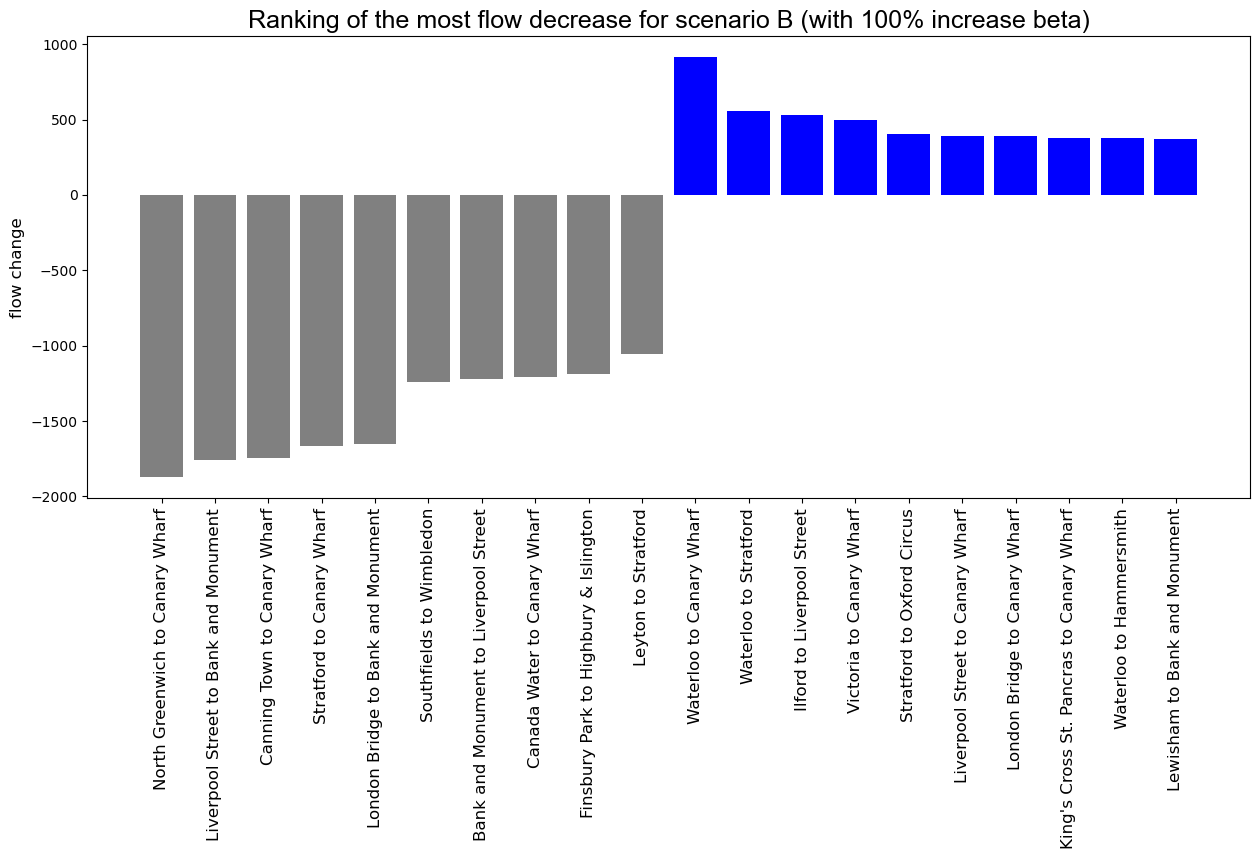

In [523]:
#plot ranking
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Ranking of the most flow decrease for scenario B (with 100% increase beta)",fontname="Arial",fontsize=18)
plt.bar(B_sorted_3['line'],B_sorted_3['change_B_2'],color='grey',orientation='vertical')
plt.bar(B_sorted_4['line'],B_sorted_4['change_B_2'],color='blue',orientation='vertical')
#plt.xticks(ticks=range(len(A_sorted['station_origin'])), rotation=90)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("flow change",fontsize=12)
plt.savefig('ranking_B2')
plt.show()

# 3.3. Discussion

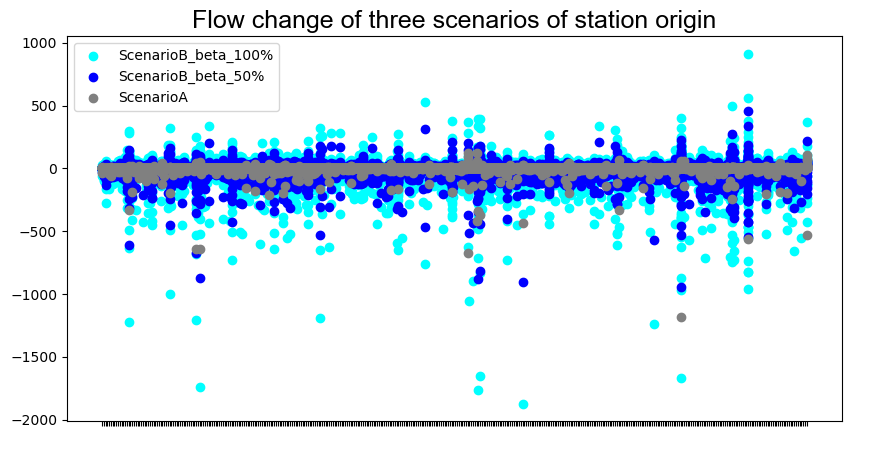

In [530]:
plt.figure(figsize=(10,5))
plt.title("Flow change of three scenarios of station origin",fontname="Arial",fontsize=18)
plt.scatter(visualization_B2['station_origin'],visualization_B2['change_B_2'],color='cyan',label='ScenarioB_beta_100%')
plt.scatter(visualization_B['station_origin'],visualization_B['change_B_1'],color='blue', label='ScenarioB_beta_50%')
plt.scatter(visualization_A['station_origin'],visualization_A['change_A'],color='grey', label='ScenarioA')
plt.xticks(color='w') 
plt.legend()
plt.savefig('F1')
plt.show()

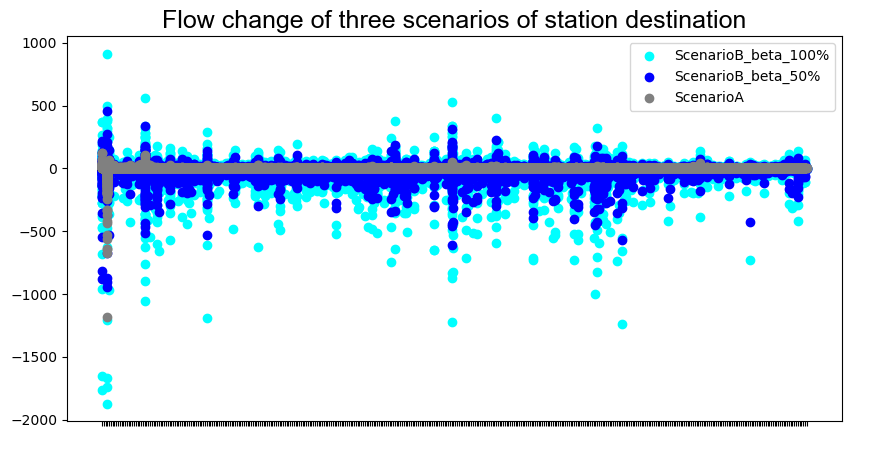

In [531]:
plt.figure(figsize=(10,5))
plt.title("Flow change of three scenarios of station destination",fontname="Arial",fontsize=18)
plt.scatter(visualization_B2['station_destination'],visualization_B2['change_B_2'],color='cyan',label='ScenarioB_beta_100%')
plt.scatter(visualization_B['station_destination'],visualization_B['change_B_1'],color='blue',label='ScenarioB_beta_50%')
plt.scatter(visualization_A['station_destination'],visualization_A['change_A'],color='grey',label='ScenarioA')
plt.xticks(color='w') 
plt.legend()
plt.savefig('F2')
plt.show()